Read Data, Preprocessing

In [1]:
# Import library

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn import svm
import optuna
from sklearn.model_selection import cross_val_score
from mlxtend.regressor import StackingCVRegressor



In [2]:
# Read data

life_expectancy_data = pd.read_csv(r'Life Expectancy Data.csv')

life_expectancy_data


,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [4]:
life_expectancy_data.describe(include = 'all')

# 1. There is a null
# 2. There are 2 categories - Country, Status
# 3. There are too many uniques in the Country column


,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2938,2938.000000,2938,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,...,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2928.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,...,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,69.224932
std,NaN,4.613841,NaN,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,...,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,9.523867
min,NaN,2000.000000,NaN,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,NaN,2004.000000,NaN,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,...,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,63.100000
50%,NaN,2008.000000,NaN,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,...,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.100000
75%,NaN,2012.000000,NaN,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,...,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,75.700000


In [5]:
life_expectancy_data.dtypes

Country                             object
Year                                 int64
Status                              object
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
Life expectancy                    float64
dtype: object

In [7]:
# Duplicate check

life_expectancy_data.duplicated().sum()

# If there is a duplicate, delete it

life_expectancy_data.drop_duplicates(inplace = True)

In [8]:
# Drop unnecessary columns, Country is unnecessary column

life_expectancy_data.drop('Country', axis = 1, inplace = True)

life_expectancy_data


,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [9]:
# Copy data for CatBoost Categoric model

life_expectancy_data_categoric = life_expectancy_data.copy()

life_expectancy_data_categoric


,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [10]:
# convert categorical to numeric with get_dummies in life_expectancy_data dataset

life_expectancy_data = pd.get_dummies(life_expectancy_data, drop_first = True)

life_expectancy_data

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy,Status_Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3,1
2934,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5,1
2935,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8,1
2936,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3,1


In [11]:
# Copy data for Tree Base Models

life_expectancy_tree_base = life_expectancy_data.copy()

life_expectancy_tree_base


,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy,Status_Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3,1
2934,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5,1
2935,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8,1
2936,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3,1


In [176]:
life_expectancy_data.isnull().sum()

Year                                 0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
Status_Developing                    0
dtype: int64

In [12]:
# If there is null, fill null for Linear Regression
# Mean method for non objects
# Mode method for objects

for rec in life_expectancy_data.columns:
    if life_expectancy_data[rec].dtypes != object and rec != 'Status':
        life_expectancy_data[rec].fillna(value = life_expectancy_data[rec].mean(), inplace = True)
    else:
        life_expectancy_data[rec].fillna(value = life_expectancy_data[rec].mode()[0], inplace = True)

life_expectancy_data.isnull().sum()

Year                               0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
Status_Developing                  0
dtype: int64

In [13]:
# If there is null, fill null for CatBoost Categoric model
# Mean method for non objects
# Mode method for objects

for rec in life_expectancy_data_categoric.columns:
    if life_expectancy_data_categoric[rec].dtypes != object and rec != 'Status':
        life_expectancy_data_categoric[rec].fillna(value = life_expectancy_data_categoric[rec].mean(), inplace = True)
    else:
        life_expectancy_data_categoric[rec].fillna(value = life_expectancy_data_categoric[rec].mode()[0], inplace = True)

life_expectancy_data_categoric.isnull().sum()

Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
dtype: int64

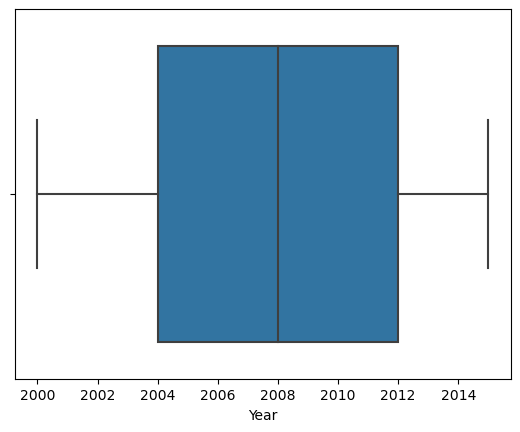

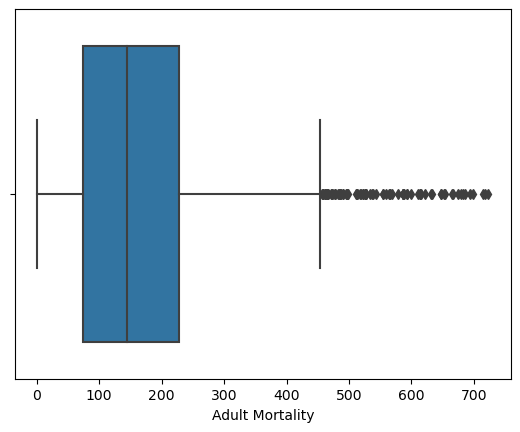

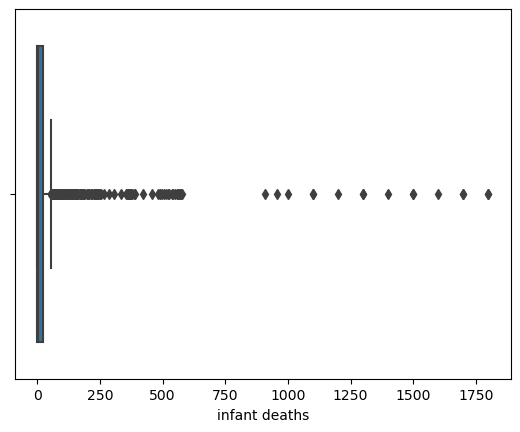

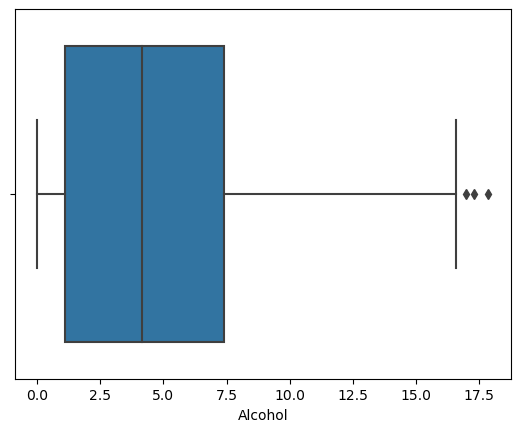

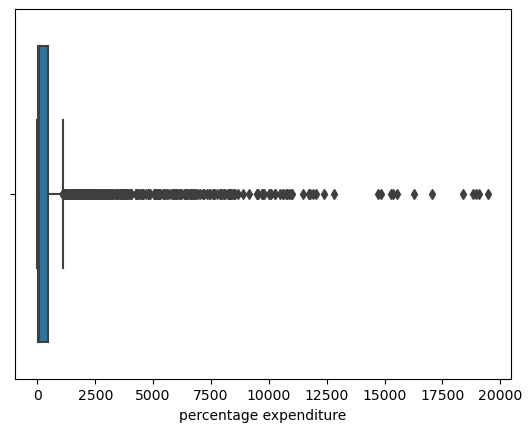

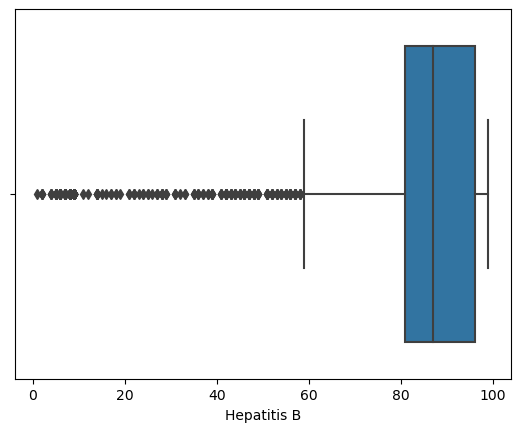

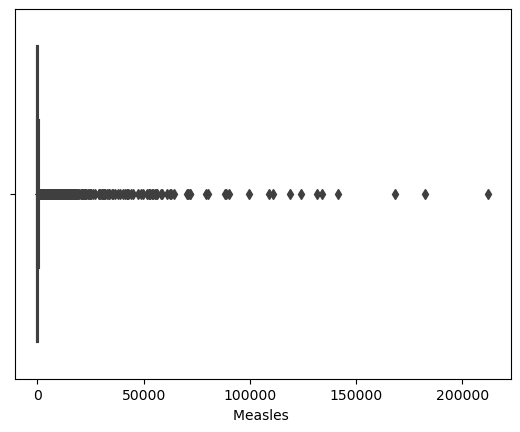

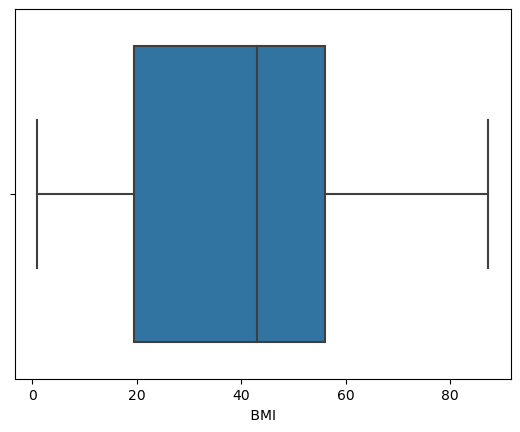

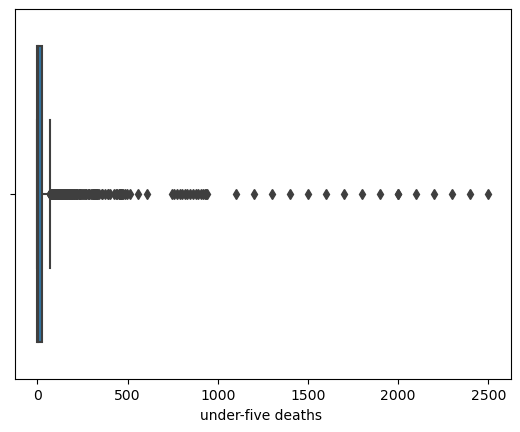

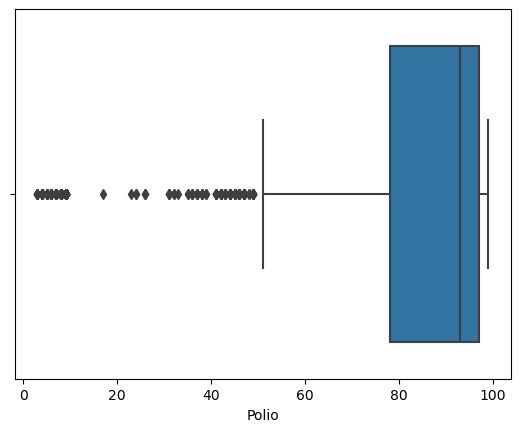

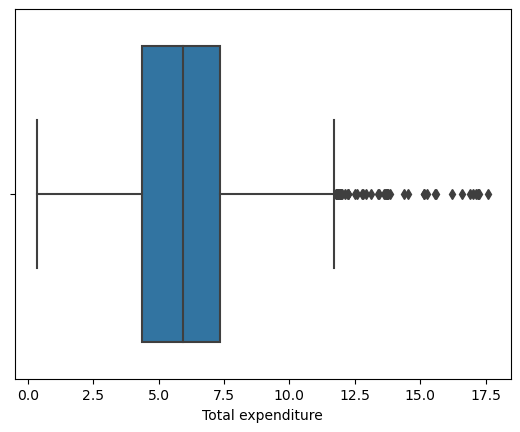

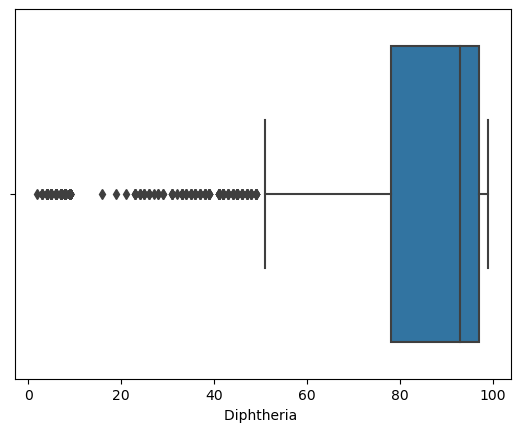

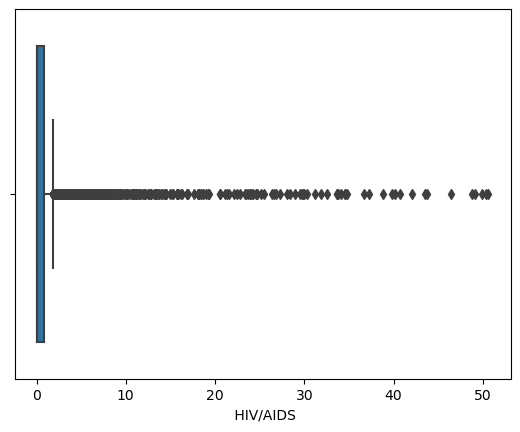

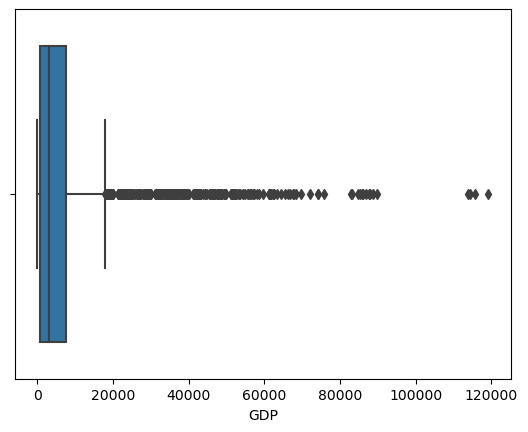

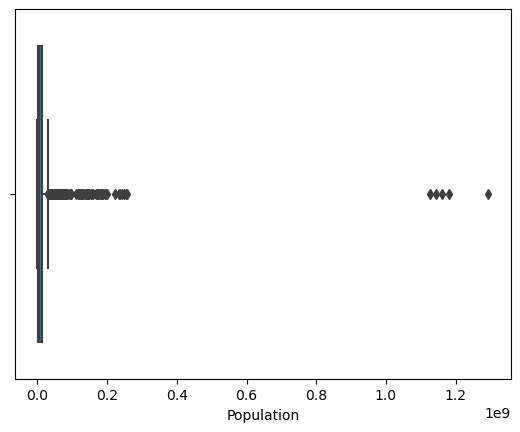

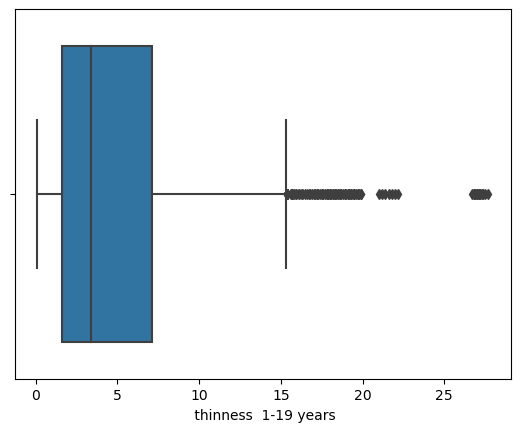

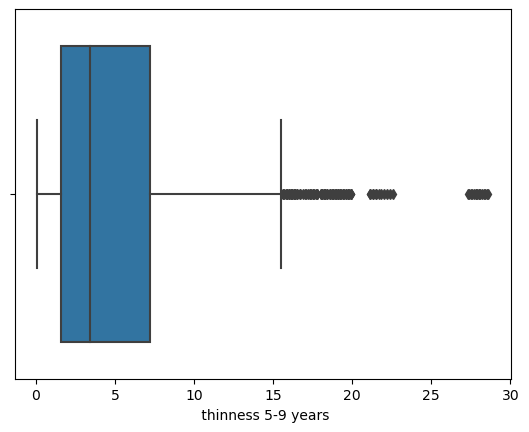

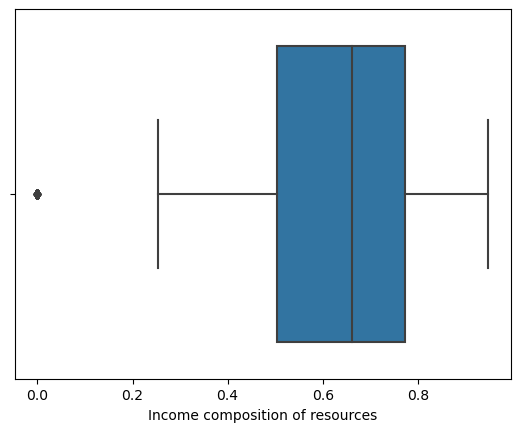

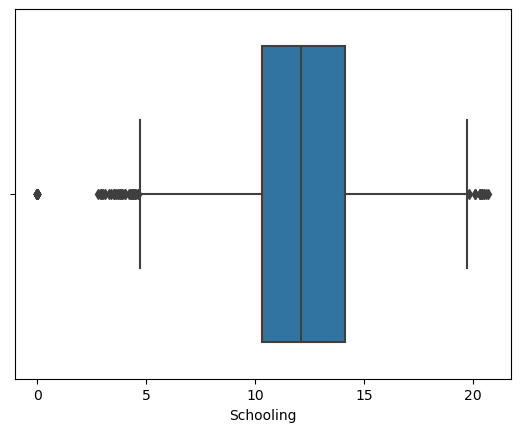

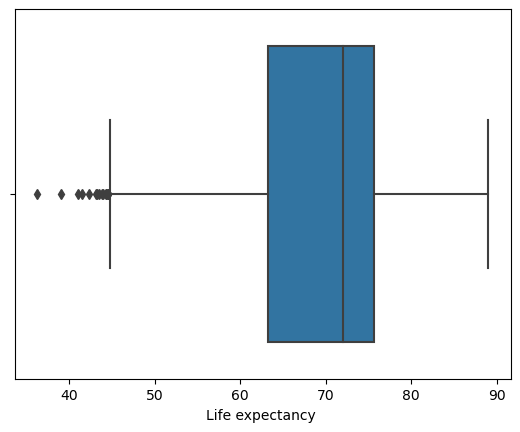

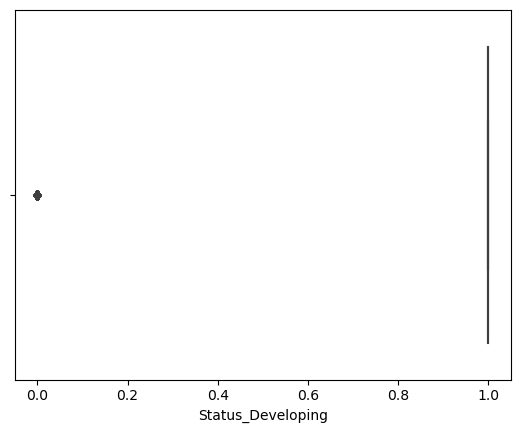

In [14]:
# outlier treatment for Linear Regression model

for rec in life_expectancy_data.columns:
    if life_expectancy_data[rec].dtypes != object:
        sns.boxplot(x = life_expectancy_data[rec], data = life_expectancy_data)
        plt.show()

In [15]:
# outlier treatment for Linear Regression

for rec in life_expectancy_data.columns:
    if life_expectancy_data[rec].dtype != object and rec != 'Life expectancy ':
        q1 = life_expectancy_data[rec].quantile(0.25)
        q3 = life_expectancy_data[rec].quantile(0.75)
        IQR = q3 - q1
        lower = q1 - 1.5 * IQR
        upper = q3 + 1.5 * IQR
        life_expectancy_data[rec] = np.where(life_expectancy_data[rec] > upper,
                                    upper,
                                    np.where(life_expectancy_data[rec] < lower,
                                             lower,
                                             life_expectancy_data[rec]))

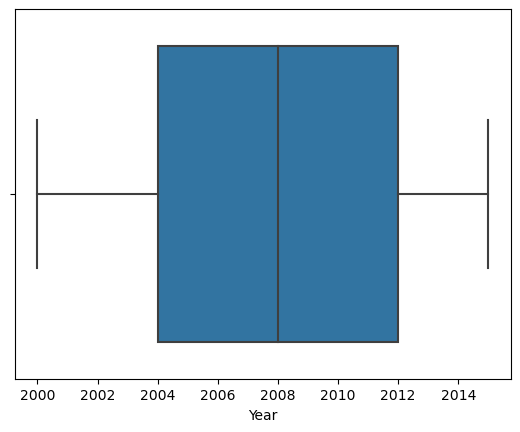

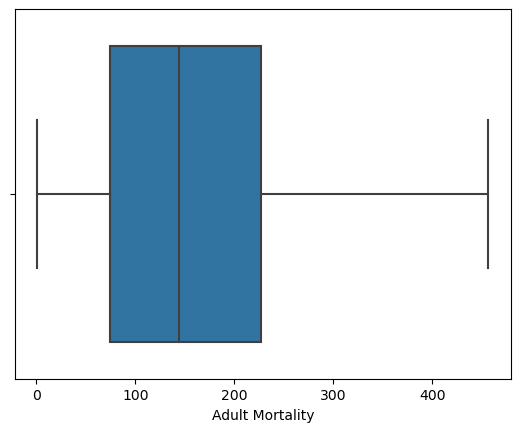

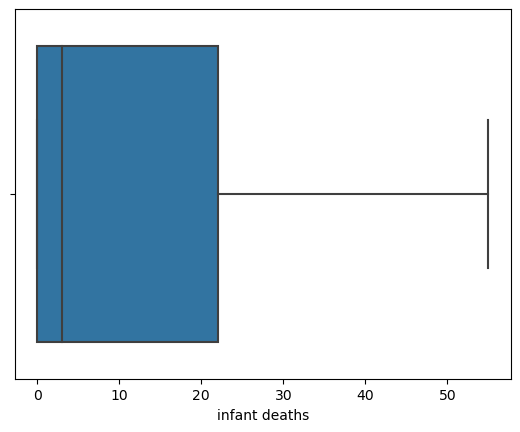

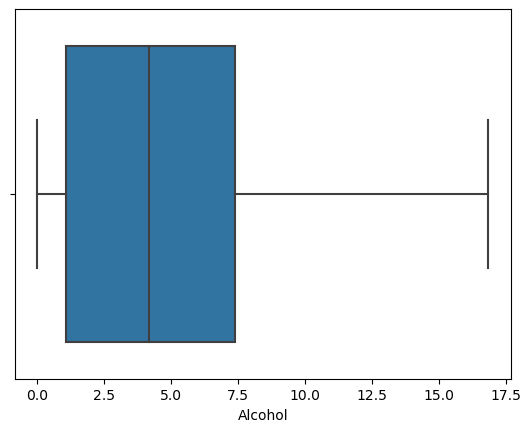

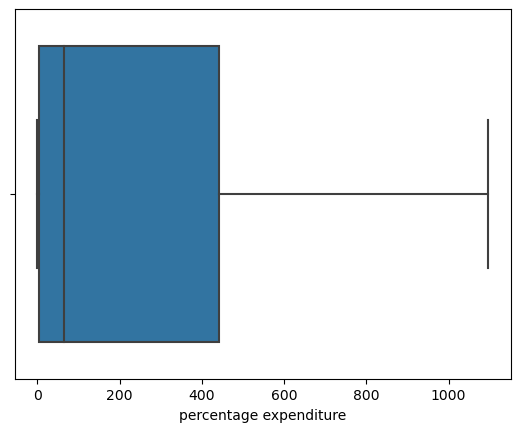

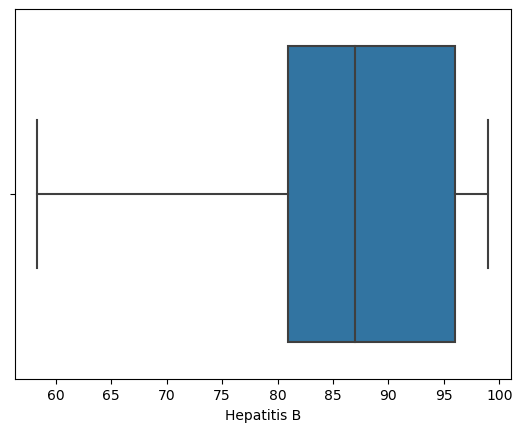

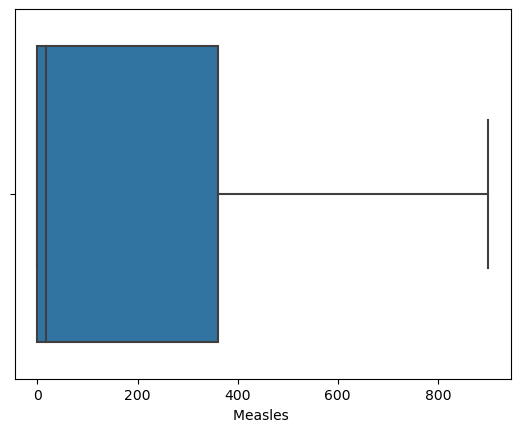

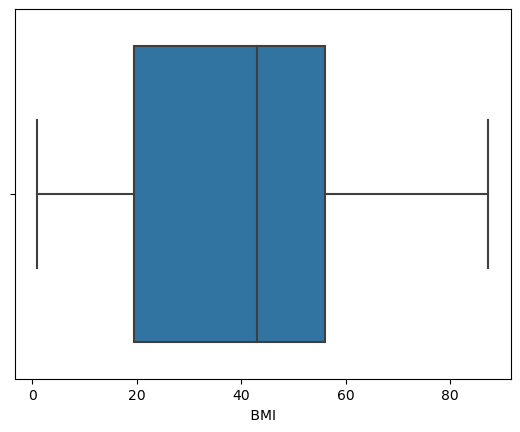

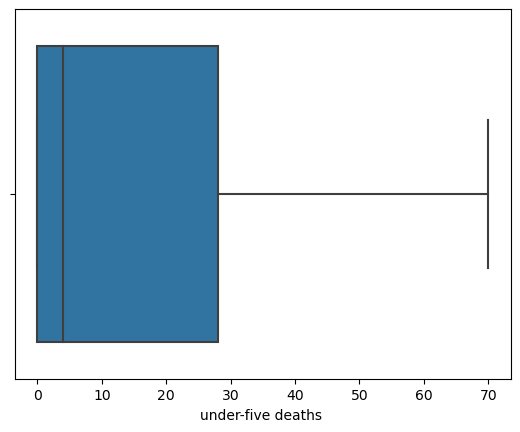

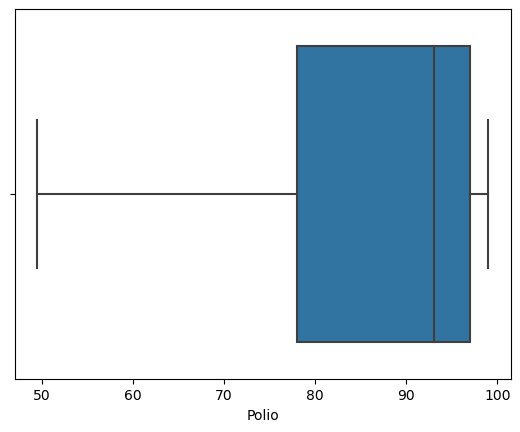

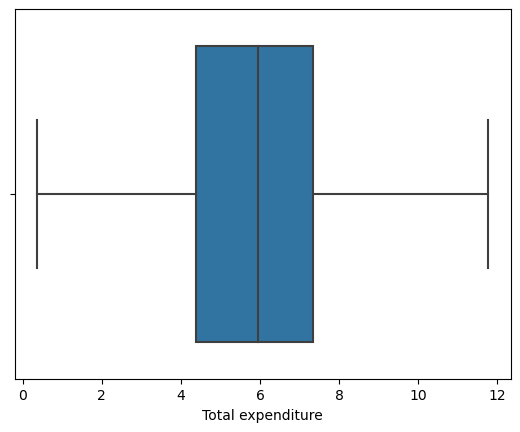

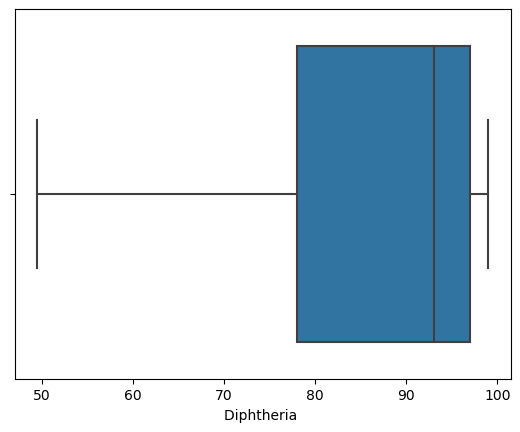

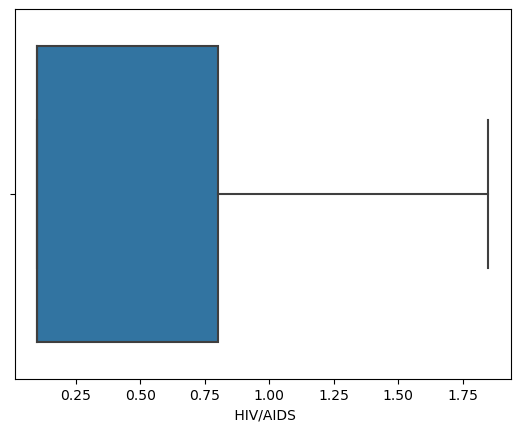

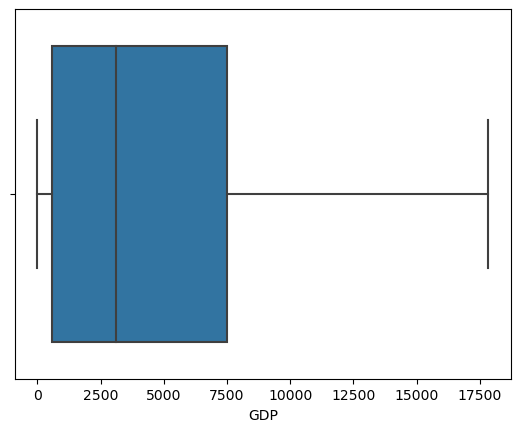

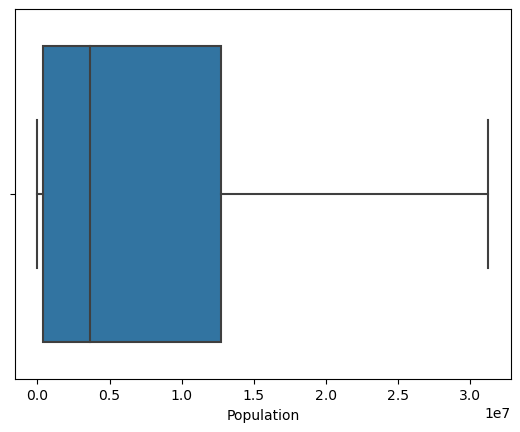

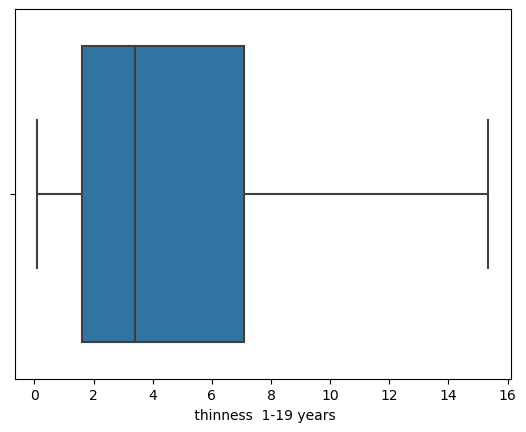

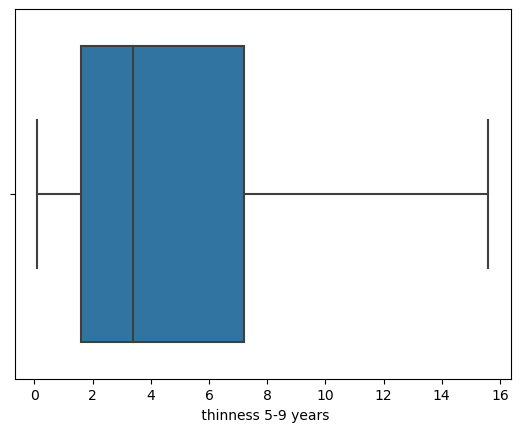

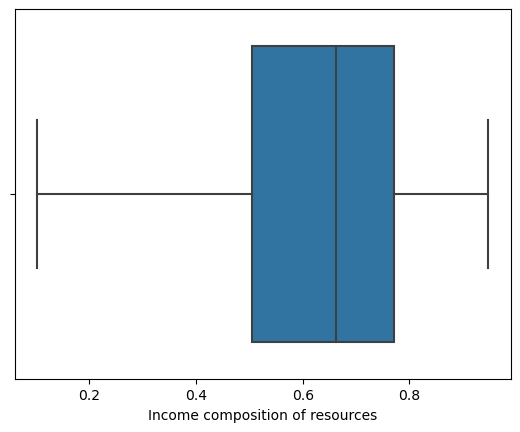

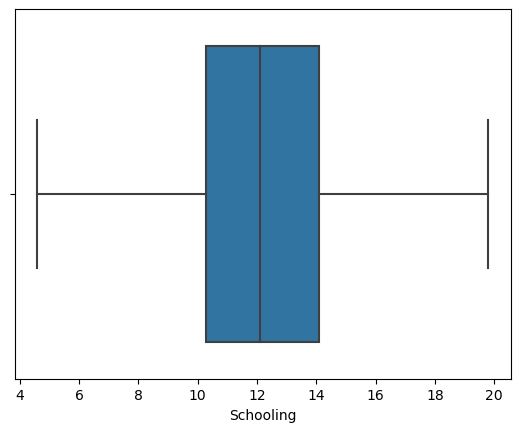

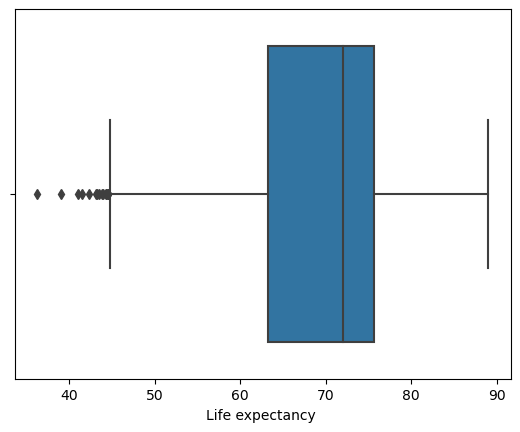

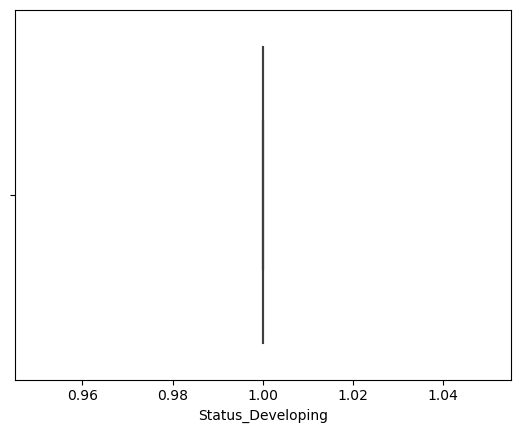

In [16]:
# outlier treatment for Linear Regression

for rec in life_expectancy_data.columns:
    if life_expectancy_data[rec].dtypes != object:
        sns.boxplot(x = life_expectancy_data[rec], data = life_expectancy_data)
        plt.show()

In [17]:
# Data is normally distributed or not

from scipy import stats

for i in life_expectancy_data.columns:
    
    if life_expectancy_data[i].dtype in ['int64', 'float64']:

        kstest_statistic, kstest_p_value = stats.kstest(life_expectancy_data[i], 'norm')
        
        print(f'Column: {i}')
        
        if kstest_p_value > 0.05:
            print('Data is normally distributed')
        else:
            print('Data is not normally distributed')

Column: Year
Data is not normally distributed
Column: Adult Mortality
Data is not normally distributed
Column: infant deaths
Data is not normally distributed
Column: Alcohol
Data is not normally distributed
Column: percentage expenditure
Data is not normally distributed
Column: Hepatitis B
Data is not normally distributed
Column: Measles 
Data is not normally distributed
Column:  BMI 
Data is not normally distributed
Column: under-five deaths 
Data is not normally distributed
Column: Polio
Data is not normally distributed
Column: Total expenditure
Data is not normally distributed
Column: Diphtheria 
Data is not normally distributed
Column:  HIV/AIDS
Data is not normally distributed
Column: GDP
Data is not normally distributed
Column: Population
Data is not normally distributed
Column:  thinness  1-19 years
Data is not normally distributed
Column:  thinness 5-9 years
Data is not normally distributed
Column: Income composition of resources
Data is not normally distributed
Column: Schooli

In [18]:
# Target correlation for Linear Regression

# Data is not normally distributed, method => spearman

# threshold is 0.1

def target_correlation(life_expectancy_data, target, threshold = 0.1):
    
    corr_matrix = life_expectancy_data.corr(method = 'spearman')
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop = True, inplace = True)
    
    return result_explaining_target


target_result = target_correlation(life_expectancy_data, 'Life expectancy ')

target_result

,Variable,Correlation with Target
0,Year,0.155319
1,Adult Mortality,-0.650749
2,infant deaths,-0.599616
3,Alcohol,0.429390
4,percentage expenditure,0.422598
5,Hepatitis B,0.315859
6,Measles,-0.279149
7,BMI,0.581018
8,under-five deaths,-0.618895
9,Polio,0.537049


In [19]:
# Inter correlation for Linear regression

# Data is not normally distributed, method => spearman

# threshold is 0.7

def intercorrelation(life_expectancy_data, target, threshold = 0.7):
    corr_matrix = life_expectancy_data.drop(columns = [target]).corr(method = 'spearman')
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    correlated_pairs_set = set()
   
    for var1, var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):

        if var1 < var2:
            correlated_pairs_set.add((corr_matrix.index[var1], corr_matrix.columns[var2]))
        else:
            correlated_pairs_set.add((corr_matrix.index[var2], corr_matrix.columns[var1]))
            
    
    result_intercorrelated_independent = pd.DataFrame(list(correlated_pairs_set), columns = ['Variable 1', 'Variable 2'])
    
    return result_intercorrelated_independent

intercorrelated_result = intercorrelation(life_expectancy_data, 'Life expectancy ')

intercorrelated_result

,Variable 1,Variable 2
0,Income composition of resources,Schooling
1,thinness 1-19 years,thinness 5-9 years
2,Hepatitis B,Diphtheria
3,Polio,Diphtheria
4,infant deaths,under-five deaths
5,Hepatitis B,Polio


In [20]:
target_result.Variable.tolist()

['Year',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [22]:
# Ignore intercorrelation variables

life_expectancy_data = life_expectancy_data[[
  'Year',
  'Adult Mortality',
# 'infant deaths',
  'Alcohol',
  'percentage expenditure',
# 'Hepatitis B',
  'Measles ',
  ' BMI ',
# 'under-five deaths ',
# 'Polio',
  'Total expenditure',
# 'Diphtheria ',
  ' HIV/AIDS',
  'GDP',
# ' thinness  1-19 years',
# ' thinness 5-9 years',
# 'Income composition of resources',
# 'Schooling',
  'Life expectancy '                                           
]]

life_expectancy_data

,Year,Adult Mortality,Alcohol,percentage expenditure,Measles,BMI,Total expenditure,HIV/AIDS,GDP,Life expectancy
0,2015.0,263.0,0.01,71.279624,900.625,19.1,8.16,0.10,584.259210,65.0
1,2014.0,271.0,0.01,73.523582,492.000,18.6,8.18,0.10,612.696514,59.9
2,2013.0,268.0,0.01,73.219243,430.000,18.1,8.13,0.10,631.744976,59.9
3,2012.0,272.0,0.01,78.184215,900.625,17.6,8.52,0.10,669.959000,59.5
4,2011.0,275.0,0.01,7.097109,900.625,17.2,7.87,0.10,63.537231,59.2
...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,456.5,4.36,0.000000,31.000,27.1,7.13,1.85,454.366654,44.3
2934,2003.0,456.5,4.06,0.000000,900.625,26.7,6.52,1.85,453.351155,44.5
2935,2002.0,73.0,4.43,0.000000,304.000,26.3,6.53,1.85,57.348340,44.8
2936,2001.0,456.5,1.72,0.000000,529.000,25.9,6.16,1.85,548.587312,45.3


In [23]:
life_expectancy_data.columns

Index(['Year', 'Adult Mortality', 'Alcohol', 'percentage expenditure',
       'Measles ', ' BMI ', 'Total expenditure', ' HIV/AIDS', 'GDP',
       'Life expectancy '],
      dtype='object')

In [24]:
life_expectancy_data.dtypes

Year                      float64
Adult Mortality           float64
Alcohol                   float64
percentage expenditure    float64
Measles                   float64
 BMI                      float64
Total expenditure         float64
 HIV/AIDS                 float64
GDP                       float64
Life expectancy           float64
dtype: object

In [25]:
# VIF for numeric variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data, variables):
    vif_data = data[variables]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({'VIF': vif_values, 'Features': variables})
    return vif_result


vif_result = calculate_vif(life_expectancy_data, [
                                                # 'Year',
                                                  'Adult Mortality',
                                                  'Alcohol',
                                                  'percentage expenditure',
                                                  'Measles ',
                                                  ' BMI ',
                                                  'Total expenditure',
                                                  ' HIV/AIDS',
                                                  'GDP'
                                                 ])


vif_result

,VIF,Features
0,4.149636,Adult Mortality
1,3.189672,Alcohol
2,3.436231,percentage expenditure
3,1.486267,Measles
4,5.057932,BMI
5,6.334353,Total expenditure
6,2.759930,HIV/AIDS
7,4.132466,GDP


In [26]:
# vif between 1 and 7

life_expectancy_data = life_expectancy_data[['Adult Mortality',
                                             'Alcohol',
                                             'percentage expenditure',
                                             'Measles ',
                                             ' BMI ',
                                             'Total expenditure',
                                             ' HIV/AIDS',
                                             'GDP',
                                             'Life expectancy '
                                            ]]

life_expectancy_data

,Adult Mortality,Alcohol,percentage expenditure,Measles,BMI,Total expenditure,HIV/AIDS,GDP,Life expectancy
0,263.0,0.01,71.279624,900.625,19.1,8.16,0.10,584.259210,65.0
1,271.0,0.01,73.523582,492.000,18.6,8.18,0.10,612.696514,59.9
2,268.0,0.01,73.219243,430.000,18.1,8.13,0.10,631.744976,59.9
3,272.0,0.01,78.184215,900.625,17.6,8.52,0.10,669.959000,59.5
4,275.0,0.01,7.097109,900.625,17.2,7.87,0.10,63.537231,59.2
...,...,...,...,...,...,...,...,...,...
2933,456.5,4.36,0.000000,31.000,27.1,7.13,1.85,454.366654,44.3
2934,456.5,4.06,0.000000,900.625,26.7,6.52,1.85,453.351155,44.5
2935,73.0,4.43,0.000000,304.000,26.3,6.53,1.85,57.348340,44.8
2936,456.5,1.72,0.000000,529.000,25.9,6.16,1.85,548.587312,45.3


In [27]:
# inputs, outputs

inputs = life_expectancy_data.drop('Life expectancy ', axis = 1)

outputs = life_expectancy_data['Life expectancy ']


inputs_tree = life_expectancy_tree_base.drop('Life expectancy ', axis = 1)

outputs_tree = life_expectancy_tree_base['Life expectancy ']


inputs_cat = life_expectancy_data_categoric.drop('Life expectancy ', axis = 1)

outputs_cat = life_expectancy_data_categoric['Life expectancy ']



In [28]:
# Scale data for Linear Regression

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

inputs_scaled = scaler.transform(inputs)

data_scaled = pd.DataFrame(inputs_scaled, columns = inputs.columns)

data_scaled

,Adult Mortality,Alcohol,percentage expenditure,Measles,BMI,Total expenditure,HIV/AIDS,GDP
0,0.874521,-1.173361,-0.546410,1.886225,-0.964715,0.985324,-0.629209,-0.814796
1,0.943807,-1.173361,-0.540647,0.730456,-0.989810,0.994061,-0.629209,-0.809714
2,0.917824,-1.173361,-0.541429,0.555093,-1.014905,0.972218,-0.629209,-0.806310
3,0.952467,-1.173361,-0.528678,1.886225,-1.040000,1.142595,-0.629209,-0.799482
4,0.978449,-1.173361,-0.711239,1.886225,-1.060076,0.858634,-0.629209,-0.907849
...,...,...,...,...,...,...,...,...
2933,2.550365,-0.061908,-0.729465,-0.573453,-0.563194,0.535355,1.895041,-0.838008
2934,2.550365,-0.138560,-0.729465,1.886225,-0.583270,0.268868,1.895041,-0.838190
2935,-0.771011,-0.044023,-0.729465,0.198710,-0.603346,0.273237,1.895041,-0.908955
2936,2.550365,-0.736445,-0.729465,0.835108,-0.623422,0.111598,1.895041,-0.821171


In [29]:
# Missing fill na for CatBoost Categoric

columns_to_fill = ['Status']

inputs_cat[columns_to_fill] = inputs_cat[columns_to_fill].fillna('Missing Value')


inputs_cat.isnull().sum()

Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [30]:
# Train test split step

# X_train, X_test, y_train, y_test for Logistic Regression
# X_train_tree, X_test_tree, y_train_tree, y_test_tree for Tree Base
# X_train_cat, X_test_cat, y_train_cat, y_test_cat for CatBoos Categoric

X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.3, random_state = 42)

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(inputs_tree, outputs_tree, test_size = 0.3, random_state = 42)

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(inputs_cat, outputs_cat, test_size = 0.3, random_state = 42)



In [32]:
models = []

linear_default = LinearRegression()
random_forest_default = RandomForestRegressor()
svr_default = svm.SVR()
lgbm_default = LGBMRegressor()
xgb_default = XGBRegressor()
catboost_default = CatBoostRegressor()
catboost_categoric_default = CatBoostRegressor(cat_features = ['Status'])

models.extend([
    ('Linear Regression Default', linear_default),
    ('Random Forest Default', random_forest_default),
    ('SVR Default', svr_default),
    ('LightGBM Default', lgbm_default),
    ('XGBoost Default', xgb_default),
    ('CatBoost Default', catboost_default),
    ('CatBoost Categoric Default', catboost_categoric_default)    
])


In [33]:
# function for metrics

def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae_test = metrics.mean_absolute_error(y_test, y_pred)
    mse_test = metrics.mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = metrics.r2_score(y_test, y_pred)


    y_pred_train = model.predict(X_train)

    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)


    results_dict = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train * 100],
        'Test': [mae_test, mse_test, rmse_test, r2_test * 100]
    }

    results_df = pd.DataFrame(results_dict)
    
    print(results_df)
    
    return r2_test

In [34]:
# fillna target variable for Tree Base models

y_train_tree.fillna(y_train_tree.mean(), inplace = True)
y_test_tree.fillna(y_test_tree.mean(), inplace = True) 

In [35]:
accuracy_df = pd.DataFrame(columns = ['Model', 'Accuracy'])

for model_name, model in models:
    
    if model_name == 'CatBoost Categoric Default':
        accuracy = train_and_evaluate_model(model_name, model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
        
    elif model_name == 'Linear Regression Default':
        accuracy = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)
    
    elif model_name == 'Random Forest Default' or model_name == 'SVR Default':
        X_train_filled = X_train_tree.copy() 
        X_test_filled = X_test_tree.copy()   
        
        for i in X_train_tree.columns:
            X_train_filled[i].fillna(X_train_tree[i].mean(), inplace = True)
            X_test_filled[i].fillna(X_test_tree[i].mean(), inplace = True) 
            
        accuracy = train_and_evaluate_model(model_name, model, X_train_filled, y_train_tree, X_test_filled, y_test_tree)
    
    else:
        accuracy = train_and_evaluate_model(model_name, model, X_train_tree, y_train_tree, X_test_tree, y_test_tree) 
      
    if accuracy is not None:
        
        accuracy_df = pd.concat([accuracy_df, pd.DataFrame({'Model': [model_name], 'Accuracy': [accuracy]})], ignore_index = True)

accuracy_df_sorted = accuracy_df.sort_values(by = 'Accuracy', ascending = False)

accuracy_df_sorted



  Metric      Train       Test
0    MAE   3.311001   3.177625
1    MSE  19.298381  17.567739
2   RMSE   4.392992   4.191389
3     R2  78.302730  81.201154
  Metric      Train       Test
0    MAE   0.461713   1.257729
1    MSE   0.543301   4.011433
2   RMSE   0.737089   2.002856
3     R2  99.389164  95.707422
  Metric      Train        Test
0    MAE   7.333767    7.733695
1    MSE  96.548070  104.922077
2   RMSE   9.825888   10.243148
3     R2  -8.549600  -12.275638
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3312
[LightGBM] [Info] Number of data points in the train set: 2056, number of used features: 20
[LightGBM] [Info] Start training from score 69.395610
  Metric      Train       Test
0    MAE   0.

141:	learn: 2.0637850	total: 181ms	remaining: 1.09s
142:	learn: 2.0595737	total: 182ms	remaining: 1.09s
143:	learn: 2.0563934	total: 183ms	remaining: 1.09s
144:	learn: 2.0470317	total: 184ms	remaining: 1.08s
145:	learn: 2.0407385	total: 184ms	remaining: 1.08s
146:	learn: 2.0365137	total: 185ms	remaining: 1.07s
147:	learn: 2.0320660	total: 186ms	remaining: 1.07s
148:	learn: 2.0267692	total: 187ms	remaining: 1.06s
149:	learn: 2.0231082	total: 188ms	remaining: 1.06s
150:	learn: 2.0197514	total: 188ms	remaining: 1.06s
151:	learn: 2.0168392	total: 189ms	remaining: 1.06s
152:	learn: 2.0125281	total: 190ms	remaining: 1.05s
153:	learn: 2.0088070	total: 191ms	remaining: 1.05s
154:	learn: 2.0048212	total: 192ms	remaining: 1.05s
155:	learn: 2.0008827	total: 193ms	remaining: 1.04s
156:	learn: 1.9970970	total: 194ms	remaining: 1.04s
157:	learn: 1.9920991	total: 195ms	remaining: 1.04s
158:	learn: 1.9881684	total: 196ms	remaining: 1.03s
159:	learn: 1.9826435	total: 197ms	remaining: 1.03s
160:	learn: 

354:	learn: 1.4200569	total: 373ms	remaining: 677ms
355:	learn: 1.4183899	total: 374ms	remaining: 676ms
356:	learn: 1.4168801	total: 375ms	remaining: 675ms
357:	learn: 1.4152071	total: 375ms	remaining: 673ms
358:	learn: 1.4140774	total: 376ms	remaining: 672ms
359:	learn: 1.4120967	total: 377ms	remaining: 670ms
360:	learn: 1.4102802	total: 378ms	remaining: 669ms
361:	learn: 1.4086888	total: 379ms	remaining: 668ms
362:	learn: 1.4074922	total: 380ms	remaining: 667ms
363:	learn: 1.4058067	total: 381ms	remaining: 665ms
364:	learn: 1.4039891	total: 382ms	remaining: 665ms
365:	learn: 1.4019125	total: 383ms	remaining: 664ms
366:	learn: 1.3996248	total: 384ms	remaining: 663ms
367:	learn: 1.3981267	total: 385ms	remaining: 661ms
368:	learn: 1.3957274	total: 386ms	remaining: 660ms
369:	learn: 1.3933668	total: 387ms	remaining: 660ms
370:	learn: 1.3920588	total: 388ms	remaining: 658ms
371:	learn: 1.3909915	total: 389ms	remaining: 657ms
372:	learn: 1.3901310	total: 390ms	remaining: 656ms
373:	learn: 

568:	learn: 1.1169984	total: 564ms	remaining: 427ms
569:	learn: 1.1159207	total: 565ms	remaining: 426ms
570:	learn: 1.1142668	total: 566ms	remaining: 425ms
571:	learn: 1.1137628	total: 566ms	remaining: 424ms
572:	learn: 1.1126528	total: 567ms	remaining: 423ms
573:	learn: 1.1117742	total: 568ms	remaining: 422ms
574:	learn: 1.1106642	total: 569ms	remaining: 420ms
575:	learn: 1.1099098	total: 569ms	remaining: 419ms
576:	learn: 1.1085673	total: 570ms	remaining: 418ms
577:	learn: 1.1075711	total: 571ms	remaining: 417ms
578:	learn: 1.1059164	total: 572ms	remaining: 416ms
579:	learn: 1.1037103	total: 573ms	remaining: 415ms
580:	learn: 1.1029960	total: 574ms	remaining: 414ms
581:	learn: 1.1015031	total: 575ms	remaining: 413ms
582:	learn: 1.1008636	total: 576ms	remaining: 412ms
583:	learn: 1.1001251	total: 577ms	remaining: 411ms
584:	learn: 1.0998837	total: 578ms	remaining: 410ms
585:	learn: 1.0996035	total: 579ms	remaining: 409ms
586:	learn: 1.0985701	total: 580ms	remaining: 408ms
587:	learn: 

785:	learn: 0.9143222	total: 755ms	remaining: 206ms
786:	learn: 0.9132325	total: 756ms	remaining: 205ms
787:	learn: 0.9126464	total: 757ms	remaining: 204ms
788:	learn: 0.9117296	total: 758ms	remaining: 203ms
789:	learn: 0.9104181	total: 759ms	remaining: 202ms
790:	learn: 0.9099219	total: 760ms	remaining: 201ms
791:	learn: 0.9087285	total: 761ms	remaining: 200ms
792:	learn: 0.9077538	total: 761ms	remaining: 199ms
793:	learn: 0.9065072	total: 762ms	remaining: 198ms
794:	learn: 0.9062174	total: 763ms	remaining: 197ms
795:	learn: 0.9056308	total: 764ms	remaining: 196ms
796:	learn: 0.9054988	total: 765ms	remaining: 195ms
797:	learn: 0.9047220	total: 766ms	remaining: 194ms
798:	learn: 0.9034771	total: 767ms	remaining: 193ms
799:	learn: 0.9028945	total: 768ms	remaining: 192ms
800:	learn: 0.9017518	total: 769ms	remaining: 191ms
801:	learn: 0.9005050	total: 770ms	remaining: 190ms
802:	learn: 0.8995687	total: 771ms	remaining: 189ms
803:	learn: 0.8988212	total: 772ms	remaining: 188ms
804:	learn: 

996:	learn: 0.7637383	total: 948ms	remaining: 2.85ms
997:	learn: 0.7627603	total: 949ms	remaining: 1.9ms
998:	learn: 0.7612998	total: 950ms	remaining: 951us
999:	learn: 0.7602244	total: 951ms	remaining: 0us
  Metric      Train       Test
0    MAE   0.534211   1.154231
1    MSE   0.577941   2.987999
2   RMSE   0.760224   1.728583
3     R2  99.350217  96.802584
Learning rate set to 0.045881
0:	learn: 9.1195650	total: 1.02ms	remaining: 1.01s
1:	learn: 8.8198631	total: 1.83ms	remaining: 914ms
2:	learn: 8.5304168	total: 3.37ms	remaining: 1.12s
3:	learn: 8.2383402	total: 4.19ms	remaining: 1.04s
4:	learn: 7.9799061	total: 4.88ms	remaining: 972ms
5:	learn: 7.7124582	total: 5.53ms	remaining: 917ms
6:	learn: 7.4590048	total: 6.27ms	remaining: 889ms
7:	learn: 7.2226592	total: 6.91ms	remaining: 857ms
8:	learn: 7.0013925	total: 7.65ms	remaining: 843ms
9:	learn: 6.7758504	total: 8.39ms	remaining: 830ms
10:	learn: 6.5732565	total: 9.09ms	remaining: 817ms
11:	learn: 6.3749636	total: 9.97ms	remaining: 

196:	learn: 1.8708910	total: 173ms	remaining: 703ms
197:	learn: 1.8669603	total: 173ms	remaining: 702ms
198:	learn: 1.8641597	total: 174ms	remaining: 701ms
199:	learn: 1.8608567	total: 175ms	remaining: 700ms
200:	learn: 1.8592157	total: 176ms	remaining: 699ms
201:	learn: 1.8565647	total: 177ms	remaining: 698ms
202:	learn: 1.8543215	total: 178ms	remaining: 698ms
203:	learn: 1.8486481	total: 179ms	remaining: 697ms
204:	learn: 1.8458164	total: 180ms	remaining: 699ms
205:	learn: 1.8420567	total: 181ms	remaining: 698ms
206:	learn: 1.8378473	total: 182ms	remaining: 697ms
207:	learn: 1.8337638	total: 183ms	remaining: 696ms
208:	learn: 1.8297688	total: 184ms	remaining: 696ms
209:	learn: 1.8269507	total: 185ms	remaining: 696ms
210:	learn: 1.8239708	total: 186ms	remaining: 695ms
211:	learn: 1.8195048	total: 187ms	remaining: 695ms
212:	learn: 1.8150133	total: 188ms	remaining: 694ms
213:	learn: 1.8106442	total: 189ms	remaining: 693ms
214:	learn: 1.8062194	total: 190ms	remaining: 693ms
215:	learn: 

405:	learn: 1.3936173	total: 364ms	remaining: 533ms
406:	learn: 1.3927884	total: 365ms	remaining: 532ms
407:	learn: 1.3915488	total: 366ms	remaining: 531ms
408:	learn: 1.3900891	total: 367ms	remaining: 530ms
409:	learn: 1.3887962	total: 368ms	remaining: 529ms
410:	learn: 1.3885628	total: 368ms	remaining: 528ms
411:	learn: 1.3866463	total: 369ms	remaining: 527ms
412:	learn: 1.3838930	total: 370ms	remaining: 526ms
413:	learn: 1.3814916	total: 371ms	remaining: 525ms
414:	learn: 1.3811909	total: 372ms	remaining: 525ms
415:	learn: 1.3806077	total: 373ms	remaining: 524ms
416:	learn: 1.3775263	total: 374ms	remaining: 523ms
417:	learn: 1.3765959	total: 375ms	remaining: 523ms
418:	learn: 1.3755562	total: 376ms	remaining: 522ms
419:	learn: 1.3748024	total: 377ms	remaining: 521ms
420:	learn: 1.3737179	total: 378ms	remaining: 520ms
421:	learn: 1.3732744	total: 379ms	remaining: 519ms
422:	learn: 1.3718881	total: 380ms	remaining: 518ms
423:	learn: 1.3705179	total: 381ms	remaining: 517ms
424:	learn: 

623:	learn: 1.1128320	total: 557ms	remaining: 335ms
624:	learn: 1.1116712	total: 558ms	remaining: 335ms
625:	learn: 1.1100903	total: 558ms	remaining: 334ms
626:	learn: 1.1099603	total: 559ms	remaining: 333ms
627:	learn: 1.1082874	total: 561ms	remaining: 332ms
628:	learn: 1.1073362	total: 562ms	remaining: 331ms
629:	learn: 1.1056027	total: 563ms	remaining: 330ms
630:	learn: 1.1040362	total: 564ms	remaining: 330ms
631:	learn: 1.1026246	total: 565ms	remaining: 329ms
632:	learn: 1.1021881	total: 566ms	remaining: 328ms
633:	learn: 1.1012263	total: 567ms	remaining: 327ms
634:	learn: 1.1002233	total: 568ms	remaining: 326ms
635:	learn: 1.0988626	total: 568ms	remaining: 325ms
636:	learn: 1.0979160	total: 569ms	remaining: 324ms
637:	learn: 1.0975960	total: 570ms	remaining: 324ms
638:	learn: 1.0967634	total: 571ms	remaining: 323ms
639:	learn: 1.0950480	total: 572ms	remaining: 322ms
640:	learn: 1.0941474	total: 573ms	remaining: 321ms
641:	learn: 1.0923184	total: 574ms	remaining: 320ms
642:	learn: 

834:	learn: 0.9140950	total: 749ms	remaining: 148ms
835:	learn: 0.9132822	total: 750ms	remaining: 147ms
836:	learn: 0.9131944	total: 751ms	remaining: 146ms
837:	learn: 0.9125603	total: 752ms	remaining: 145ms
838:	learn: 0.9121190	total: 752ms	remaining: 144ms
839:	learn: 0.9113057	total: 753ms	remaining: 143ms
840:	learn: 0.9101981	total: 754ms	remaining: 143ms
841:	learn: 0.9089495	total: 755ms	remaining: 142ms
842:	learn: 0.9084693	total: 756ms	remaining: 141ms
843:	learn: 0.9074942	total: 757ms	remaining: 140ms
844:	learn: 0.9073139	total: 758ms	remaining: 139ms
845:	learn: 0.9065361	total: 759ms	remaining: 138ms
846:	learn: 0.9056907	total: 760ms	remaining: 137ms
847:	learn: 0.9043107	total: 761ms	remaining: 136ms
848:	learn: 0.9039033	total: 762ms	remaining: 136ms
849:	learn: 0.9028347	total: 763ms	remaining: 135ms
850:	learn: 0.9019610	total: 764ms	remaining: 134ms
851:	learn: 0.9007129	total: 765ms	remaining: 133ms
852:	learn: 0.8997666	total: 766ms	remaining: 132ms
853:	learn: 

,Model,Accuracy
5,CatBoost Default,0.968026
6,CatBoost Categoric Default,0.965599
4,XGBoost Default,0.962457
3,LightGBM Default,0.961072
1,Random Forest Default,0.957074
0,Linear Regression Default,0.812012
2,SVR Default,-0.122756


In [36]:
accuracy_df_sorted

,Model,Accuracy
5,CatBoost Default,0.968026
6,CatBoost Categoric Default,0.965599
4,XGBoost Default,0.962457
3,LightGBM Default,0.961072
1,Random Forest Default,0.957074
0,Linear Regression Default,0.812012
2,SVR Default,-0.122756


In [37]:
# LGBMRegressor Optuna

def best_params_for_model(trial):
    param = {
        'metric': 'r2',
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'n_estimators': trial.suggest_int('n_estimators', 1, 10),
        'random_state': 42
    }

    lgbm_reg = LGBMRegressor(**param)

    score = cross_val_score(lgbm_reg, X_train_tree, y_train_tree, cv = 3, scoring = 'r2', n_jobs = -1).mean()

    return score

study = optuna.create_study(direction = 'maximize')
study.optimize(best_params_for_model, n_trials = 10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_lgbm_model = LGBMRegressor(**best_params)


[I 2024-05-22 10:08:06,379] A new study created in memory with name: no-name-2975ab13-9afa-4d17-ac26-384f4899b05a
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_21063/1818115288.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
[I 2024-05-22 10:08:08,403] Trial 0 finished with value: 0.030981024759188885 and parameters: {'num_leaves': 105, 'learning_rate': 0.002234253677660409, 'min_child_samples': 86, 'n_estimators': 10}. Best is trial 0 with value: 0.030981024759188885.
[I 2024-05-22 10:08:09,549] Trial 1 finished with value: -0.0018672756353152649 and parameters: {'num_leaves': 203, 'learning_rate': 0.00114124411311351, 'min_child_samples': 34, 'n_estimators': 2}. Best is trial 0 with value: 0.030981024759188885.
[I 2024-05-22 10:08:10,722]

Best trial:
  Value: 0.589
  Params:  {'num_leaves': 56, 'learning_rate': 0.057436416843017965, 'min_child_samples': 94, 'n_estimators': 10}


In [38]:
# XGBRegressor Optuna

import optuna
from sklearn.model_selection import cross_val_score

def best_params_for_model(trial):
    param = {
        'C': trial.suggest_loguniform('C', 0.1, 10), 
        'kernel': trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
        'degree': trial.suggest_int('degree', 2, 5), 
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'epsilon': trial.suggest_loguniform('epsilon', 0.01, 1.0) 
    }

    xg_reg = XGBRegressor(**param)

    score = cross_val_score(xg_reg, X_train_tree, y_train_tree, cv = 3, scoring = 'r2', n_jobs = -1).mean()

    return score

study = optuna.create_study(direction = 'maximize')
study.optimize(best_params_for_model, n_trials = 10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_xgb_model = XGBRegressor(**best_params)


[I 2024-05-22 10:08:13,242] A new study created in memory with name: no-name-c8b1678d-f3f5-48ea-8078-c83f7642a134
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_21063/1985869804.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.1, 10),
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_21063/1985869804.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_21063/1985869804.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.

[I 2024-05-22 10:08:14,646] Trial 6 finished with value: 0.9484798728503607 and parameters: {'C': 0.3839176496901527, 'kernel': 'rbf', 'degree': 3, 'gamma': 0.0021883973064579275, 'epsilon': 0.03857216514393056}. Best is trial 0 with value: 0.9485536161812042.
/Users/imanovaax/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:08:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "C", "degree", "epsilon", "kernel" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/imanovaax/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:08:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "C", "degree", "epsilon", "kernel" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/imanovaax/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:08:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "C", "degree", "epsilon",

Best trial:
  Value: 0.949
  Params:  {'C': 2.012696130900824, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.00021507981125190072, 'epsilon': 0.0990290129889576}


In [39]:
# CatBoostRegressor Optuna

def best_params_for_model(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 1, 100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
        'loss_function': 'RMSE'
    }

    cb_reg = CatBoostRegressor(**param)

    mse = -cross_val_score(cb_reg, X_train_tree, y_train_tree, cv = 3, scoring = 'r2', n_jobs = -1).mean()
    return mse

study = optuna.create_study(direction = 'minimize')
study.optimize(best_params_for_model, n_trials = 10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(-study.best_value))
print('  Params: ', best_params)

best_cb_model = CatBoostRegressor(**best_params)


[I 2024-05-22 10:08:15,274] A new study created in memory with name: no-name-42578233-f2d0-4233-8d49-7035c183ec87
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_21063/1413715232.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/var/folders/xh/svg2gts57kg3zcc22897rkdw0000gn/T/ipykernel_21063/1413715232.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2024-05-22 10:08:15,764] Trial 0 finished with value: -0.836013040688926 and parameters: {'iterations': 4, 'learning_rate': 0.35796018395960544, 'depth': 9, 'l2_leaf_reg

Best trial:
  Value: 0.940
  Params:  {'iterations': 84, 'learning_rate': 0.1580069695572222, 'depth': 4, 'l2_leaf_reg': 0.6775382363550829}


In [44]:
# RandomForestClassifier Optuna

# Fill na for Random Forest Optuna

X_train_filled = X_train_tree.copy() 
X_test_filled = X_test_tree.copy()

for i in X_train_tree.columns:
    X_train_filled[i].fillna(X_train_tree[i].mean(), inplace = True)
    X_test_filled[i].fillna(X_test_tree[i].mean(), inplace = True) 

from sklearn.ensemble import RandomForestRegressor

def best_params_for_model(trial):

    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
    }

    randf_reg = RandomForestRegressor(**param)

    score = cross_val_score(randf_reg, X_train_filled, y_train_tree, cv = 3, scoring = 'r2', n_jobs = -1).mean()

    return score

study = optuna.create_study(direction = 'maximize')
study.optimize(best_params_for_model, n_trials = 10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_rf_model = RandomForestRegressor(**best_params)

[I 2024-05-22 10:17:34,313] A new study created in memory with name: no-name-325ac07c-42a6-4334-9867-623cf4758109
[I 2024-05-22 10:17:34,785] Trial 0 finished with value: 0.8462356028880017 and parameters: {'n_estimators': 545, 'max_depth': 3, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8462356028880017.
[I 2024-05-22 10:17:35,212] Trial 1 finished with value: 0.9115013723416517 and parameters: {'n_estimators': 319, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.9115013723416517.
[I 2024-05-22 10:17:36,225] Trial 2 finished with value: 0.8813998190097858 and parameters: {'n_estimators': 964, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9115013723416517.
[I 2024-05-22 10:17:37,245] Trial 3 finished with value: 0.9031400581716493 and parameters: {'n_estimators': 870, 'max_depth': 5, 'mi

Best trial:
  Value: 0.932
  Params:  {'n_estimators': 506, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


In [45]:
models_optimized = []

best_rf_model = RandomForestRegressor()
best_lgbm_model = LGBMRegressor()
best_xgb_model = XGBRegressor()
best_cb_model = CatBoostRegressor()


models_optimized.extend([
    ('XGBoost Optuna', best_xgb_model),
    ('LightGBM Optuna', best_lgbm_model),
    ('CatBoost Optuna', best_cb_model),
    ('Random Forest Optuna', best_rf_model)
])



In [46]:
accuracy_df_optuna = pd.DataFrame(columns = ['Model', 'Accuracy'])

for model_name, model in models_optimized:
    
    if model_name == 'Random Forest Optuna':
            
        accuracy = train_and_evaluate_model(model_name, model, X_train_filled, y_train_tree, X_test_filled, y_test_tree)
    
    else:
        accuracy = train_and_evaluate_model(model_name, model, X_train_tree, y_train_tree, X_test_tree, y_test_tree) 
      
    if accuracy is not None:
        
        accuracy_df_optuna = pd.concat([accuracy_df_optuna, pd.DataFrame({'Model': [model_name], 'Accuracy': [accuracy]})], ignore_index = True)

accuracy_df_optuna_sorted = accuracy_df_optuna.sort_values(by = 'Accuracy', ascending = False)

accuracy_df_optuna_sorted


  Metric      Train       Test
0    MAE   0.146250   1.293708
1    MSE   0.042363   3.662202
2   RMSE   0.205823   1.913688
3     R2  99.952371  96.081129
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3312
[LightGBM] [Info] Number of data points in the train set: 2056, number of used features: 20
[LightGBM] [Info] Start training from score 69.395610
  Metric      Train       Test
0    MAE   0.582713   1.260116
1    MSE   0.767228   3.636769
2   RMSE   0.875916   1.907031
3     R2  99.137400  96.108345
Learning rate set to 0.045881
0:	learn: 9.1011585	total: 1.54ms	remaining: 1.54s
1:	learn: 8.8071209	total: 2.61ms	remaining: 1.3s
2:	learn: 8.5016308	total: 4.1ms	remaining: 1.36s
3:	learn: 8.2141728	total: 5.04ms	remaining: 1.25s
4:	learn: 7.9392669	total: 5.97ms	re

213:	learn: 1.8392115	total: 189ms	remaining: 694ms
214:	learn: 1.8342348	total: 191ms	remaining: 696ms
215:	learn: 1.8306680	total: 191ms	remaining: 695ms
216:	learn: 1.8294054	total: 192ms	remaining: 694ms
217:	learn: 1.8256238	total: 193ms	remaining: 692ms
218:	learn: 1.8222360	total: 194ms	remaining: 691ms
219:	learn: 1.8200570	total: 195ms	remaining: 691ms
220:	learn: 1.8160234	total: 196ms	remaining: 690ms
221:	learn: 1.8146686	total: 197ms	remaining: 689ms
222:	learn: 1.8117943	total: 198ms	remaining: 689ms
223:	learn: 1.8096392	total: 198ms	remaining: 688ms
224:	learn: 1.8072522	total: 199ms	remaining: 687ms
225:	learn: 1.8037426	total: 200ms	remaining: 686ms
226:	learn: 1.7989261	total: 201ms	remaining: 686ms
227:	learn: 1.7969494	total: 203ms	remaining: 686ms
228:	learn: 1.7944528	total: 204ms	remaining: 685ms
229:	learn: 1.7903854	total: 204ms	remaining: 684ms
230:	learn: 1.7880766	total: 205ms	remaining: 683ms
231:	learn: 1.7866460	total: 206ms	remaining: 682ms
232:	learn: 

418:	learn: 1.3787589	total: 380ms	remaining: 526ms
419:	learn: 1.3777592	total: 380ms	remaining: 525ms
420:	learn: 1.3753622	total: 381ms	remaining: 524ms
421:	learn: 1.3728494	total: 382ms	remaining: 523ms
422:	learn: 1.3707769	total: 383ms	remaining: 522ms
423:	learn: 1.3698158	total: 384ms	remaining: 521ms
424:	learn: 1.3686086	total: 385ms	remaining: 520ms
425:	learn: 1.3668021	total: 386ms	remaining: 520ms
426:	learn: 1.3643330	total: 387ms	remaining: 519ms
427:	learn: 1.3627608	total: 387ms	remaining: 518ms
428:	learn: 1.3617806	total: 388ms	remaining: 517ms
429:	learn: 1.3595352	total: 389ms	remaining: 516ms
430:	learn: 1.3576594	total: 390ms	remaining: 515ms
431:	learn: 1.3561683	total: 391ms	remaining: 514ms
432:	learn: 1.3543325	total: 392ms	remaining: 514ms
433:	learn: 1.3532000	total: 393ms	remaining: 513ms
434:	learn: 1.3505111	total: 394ms	remaining: 512ms
435:	learn: 1.3479559	total: 395ms	remaining: 511ms
436:	learn: 1.3461311	total: 396ms	remaining: 510ms
437:	learn: 

637:	learn: 1.1045135	total: 572ms	remaining: 324ms
638:	learn: 1.1032656	total: 573ms	remaining: 324ms
639:	learn: 1.1027479	total: 573ms	remaining: 323ms
640:	learn: 1.1025355	total: 574ms	remaining: 322ms
641:	learn: 1.1017297	total: 576ms	remaining: 321ms
642:	learn: 1.1005359	total: 577ms	remaining: 320ms
643:	learn: 1.0991096	total: 577ms	remaining: 319ms
644:	learn: 1.0980329	total: 578ms	remaining: 318ms
645:	learn: 1.0967758	total: 579ms	remaining: 317ms
646:	learn: 1.0951544	total: 581ms	remaining: 317ms
647:	learn: 1.0932502	total: 582ms	remaining: 316ms
648:	learn: 1.0913984	total: 583ms	remaining: 315ms
649:	learn: 1.0906485	total: 584ms	remaining: 315ms
650:	learn: 1.0897125	total: 585ms	remaining: 314ms
651:	learn: 1.0885571	total: 586ms	remaining: 313ms
652:	learn: 1.0880280	total: 587ms	remaining: 312ms
653:	learn: 1.0872262	total: 588ms	remaining: 311ms
654:	learn: 1.0863987	total: 589ms	remaining: 310ms
655:	learn: 1.0841279	total: 590ms	remaining: 309ms
656:	learn: 

824:	learn: 0.9302567	total: 760ms	remaining: 161ms
825:	learn: 0.9295208	total: 761ms	remaining: 160ms
826:	learn: 0.9285651	total: 762ms	remaining: 159ms
827:	learn: 0.9272243	total: 763ms	remaining: 158ms
828:	learn: 0.9259699	total: 764ms	remaining: 158ms
829:	learn: 0.9255414	total: 765ms	remaining: 157ms
830:	learn: 0.9245438	total: 766ms	remaining: 156ms
831:	learn: 0.9233187	total: 767ms	remaining: 155ms
832:	learn: 0.9227514	total: 768ms	remaining: 154ms
833:	learn: 0.9218065	total: 769ms	remaining: 153ms
834:	learn: 0.9210487	total: 770ms	remaining: 152ms
835:	learn: 0.9195598	total: 771ms	remaining: 151ms
836:	learn: 0.9187777	total: 772ms	remaining: 150ms
837:	learn: 0.9180270	total: 773ms	remaining: 150ms
838:	learn: 0.9171662	total: 774ms	remaining: 149ms
839:	learn: 0.9164031	total: 775ms	remaining: 148ms
840:	learn: 0.9156030	total: 776ms	remaining: 147ms
841:	learn: 0.9151724	total: 778ms	remaining: 146ms
842:	learn: 0.9148716	total: 779ms	remaining: 145ms
843:	learn: 

  Metric      Train       Test
0    MAE   0.454389   1.249505
1    MSE   0.539763   4.006812
2   RMSE   0.734686   2.001702
3     R2  99.393141  95.712367


,Model,Accuracy
2,CatBoost Optuna,0.965828
1,LightGBM Optuna,0.961083
0,XGBoost Optuna,0.960811
3,Random Forest Optuna,0.957124


In [47]:
accuracy_df_optuna_sorted

,Model,Accuracy
2,CatBoost Optuna,0.965828
1,LightGBM Optuna,0.961083
0,XGBoost Optuna,0.960811
3,Random Forest Optuna,0.957124


In [51]:
final_review = pd.concat([accuracy_df_sorted, accuracy_df_optuna_sorted], axis = 0)

final_review_sorted = final_review.sort_values(by = 'Accuracy', ascending = False)
final_review_sorted.reset_index(drop = True, inplace = True)

final_review_sorted

,Model,Accuracy
0,CatBoost Default,0.968026
1,CatBoost Optuna,0.965828
2,CatBoost Categoric Default,0.965599
3,XGBoost Default,0.962457
4,LightGBM Optuna,0.961083
5,LightGBM Default,0.961072
6,XGBoost Optuna,0.960811
7,Random Forest Optuna,0.957124
8,Random Forest Default,0.957074
9,Linear Regression Default,0.812012


In [54]:
# for Stacking Classifier

reg1 = xgb_default
reg2 = best_lgbm_model
reg3 = best_rf_model


In [55]:
meta_classifier = catboost_default

In [101]:
# pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [56]:
from mlxtend.regressor import StackingCVRegressor

In [57]:
stacking_regressor = StackingCVRegressor(regressors = [reg1, reg2, reg3],
                                         meta_regressor = meta_classifier,
                                         cv = 5, 
                                         use_features_in_secondary = True,
                                         verbose = 1,
                                         random_state = 42)

In [58]:
train_and_evaluate_model('Stacking Classifier', stacking_regressor, X_train_tree, y_train_tree, X_test_tree, y_test_tree)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3224
[LightGBM] [Info] Number of data points in the train set: 1644, number of used features: 20
[LightGBM] [Info] Start training from score 69.534293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3230
[LightGBM] [Info] Number of data points in the train set: 1645, number of used features: 20
[LightGBM] [Info] Start training from score 69.572877
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3235
[LightGBM] [Info] Number of data points in the train set: 1645, number of used features: 20
[LightGBM] [Info] Start trai

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.4s finished


Learning rate set to 0.045881
0:	learn: 9.0620105	total: 1.76ms	remaining: 1.76s
1:	learn: 8.7050133	total: 2.79ms	remaining: 1.39s
2:	learn: 8.3559816	total: 3.62ms	remaining: 1.2s
3:	learn: 8.0318137	total: 4.42ms	remaining: 1.1s
4:	learn: 7.7361429	total: 5.39ms	remaining: 1.07s
5:	learn: 7.4352451	total: 6.14ms	remaining: 1.02s
6:	learn: 7.1524846	total: 7.11ms	remaining: 1.01s
7:	learn: 6.8812506	total: 8.04ms	remaining: 997ms
8:	learn: 6.6210383	total: 8.82ms	remaining: 971ms
9:	learn: 6.3695400	total: 9.63ms	remaining: 954ms
10:	learn: 6.1414966	total: 10.4ms	remaining: 936ms
11:	learn: 5.9281597	total: 11.1ms	remaining: 917ms
12:	learn: 5.7406435	total: 11.9ms	remaining: 902ms
13:	learn: 5.5411209	total: 12.6ms	remaining: 890ms
14:	learn: 5.3510223	total: 13.5ms	remaining: 885ms
15:	learn: 5.1683588	total: 14.5ms	remaining: 890ms
16:	learn: 4.9934765	total: 15.5ms	remaining: 896ms
17:	learn: 4.8213522	total: 16.5ms	remaining: 898ms
18:	learn: 4.6596448	total: 17.5ms	remaining: 

173:	learn: 1.7091897	total: 188ms	remaining: 891ms
174:	learn: 1.7086390	total: 189ms	remaining: 891ms
175:	learn: 1.7067576	total: 190ms	remaining: 890ms
176:	learn: 1.7057986	total: 191ms	remaining: 889ms
177:	learn: 1.7032398	total: 192ms	remaining: 888ms
178:	learn: 1.7019116	total: 193ms	remaining: 887ms
179:	learn: 1.7003538	total: 195ms	remaining: 888ms
180:	learn: 1.6989968	total: 196ms	remaining: 888ms
181:	learn: 1.6975381	total: 197ms	remaining: 887ms
182:	learn: 1.6964494	total: 198ms	remaining: 886ms
183:	learn: 1.6943330	total: 199ms	remaining: 885ms
184:	learn: 1.6922311	total: 200ms	remaining: 883ms
185:	learn: 1.6903665	total: 202ms	remaining: 882ms
186:	learn: 1.6898156	total: 203ms	remaining: 881ms
187:	learn: 1.6885920	total: 204ms	remaining: 879ms
188:	learn: 1.6867189	total: 205ms	remaining: 878ms
189:	learn: 1.6857024	total: 206ms	remaining: 877ms
190:	learn: 1.6838324	total: 207ms	remaining: 875ms
191:	learn: 1.6828311	total: 208ms	remaining: 874ms
192:	learn: 

346:	learn: 1.4497519	total: 377ms	remaining: 709ms
347:	learn: 1.4489238	total: 378ms	remaining: 708ms
348:	learn: 1.4476641	total: 379ms	remaining: 707ms
349:	learn: 1.4467053	total: 380ms	remaining: 706ms
350:	learn: 1.4446107	total: 381ms	remaining: 705ms
351:	learn: 1.4424023	total: 382ms	remaining: 704ms
352:	learn: 1.4413738	total: 383ms	remaining: 702ms
353:	learn: 1.4401058	total: 385ms	remaining: 702ms
354:	learn: 1.4390019	total: 386ms	remaining: 701ms
355:	learn: 1.4373719	total: 387ms	remaining: 699ms
356:	learn: 1.4365227	total: 388ms	remaining: 698ms
357:	learn: 1.4354421	total: 389ms	remaining: 697ms
358:	learn: 1.4343541	total: 390ms	remaining: 696ms
359:	learn: 1.4335333	total: 391ms	remaining: 694ms
360:	learn: 1.4315695	total: 392ms	remaining: 693ms
361:	learn: 1.4303772	total: 393ms	remaining: 692ms
362:	learn: 1.4297810	total: 394ms	remaining: 691ms
363:	learn: 1.4289228	total: 395ms	remaining: 690ms
364:	learn: 1.4265471	total: 396ms	remaining: 689ms
365:	learn: 

525:	learn: 1.2571541	total: 565ms	remaining: 509ms
526:	learn: 1.2548961	total: 566ms	remaining: 508ms
527:	learn: 1.2531179	total: 567ms	remaining: 507ms
528:	learn: 1.2517671	total: 568ms	remaining: 506ms
529:	learn: 1.2511704	total: 569ms	remaining: 505ms
530:	learn: 1.2501436	total: 570ms	remaining: 504ms
531:	learn: 1.2489979	total: 572ms	remaining: 503ms
532:	learn: 1.2468603	total: 573ms	remaining: 502ms
533:	learn: 1.2463855	total: 574ms	remaining: 501ms
534:	learn: 1.2453280	total: 575ms	remaining: 500ms
535:	learn: 1.2444865	total: 576ms	remaining: 499ms
536:	learn: 1.2434995	total: 577ms	remaining: 497ms
537:	learn: 1.2423322	total: 578ms	remaining: 496ms
538:	learn: 1.2402292	total: 579ms	remaining: 495ms
539:	learn: 1.2402081	total: 580ms	remaining: 494ms
540:	learn: 1.2389962	total: 581ms	remaining: 493ms
541:	learn: 1.2382106	total: 582ms	remaining: 492ms
542:	learn: 1.2368699	total: 583ms	remaining: 491ms
543:	learn: 1.2359139	total: 584ms	remaining: 490ms
544:	learn: 

710:	learn: 1.0809315	total: 754ms	remaining: 307ms
711:	learn: 1.0801370	total: 755ms	remaining: 305ms
712:	learn: 1.0798809	total: 756ms	remaining: 304ms
713:	learn: 1.0785193	total: 757ms	remaining: 303ms
714:	learn: 1.0775006	total: 758ms	remaining: 302ms
715:	learn: 1.0767912	total: 759ms	remaining: 301ms
716:	learn: 1.0758215	total: 760ms	remaining: 300ms
717:	learn: 1.0752644	total: 761ms	remaining: 299ms
718:	learn: 1.0740904	total: 762ms	remaining: 298ms
719:	learn: 1.0733055	total: 763ms	remaining: 297ms
720:	learn: 1.0727577	total: 765ms	remaining: 296ms
721:	learn: 1.0727206	total: 766ms	remaining: 295ms
722:	learn: 1.0723706	total: 767ms	remaining: 294ms
723:	learn: 1.0717758	total: 768ms	remaining: 293ms
724:	learn: 1.0713371	total: 769ms	remaining: 292ms
725:	learn: 1.0706477	total: 770ms	remaining: 290ms
726:	learn: 1.0698688	total: 771ms	remaining: 289ms
727:	learn: 1.0688176	total: 772ms	remaining: 288ms
728:	learn: 1.0684214	total: 773ms	remaining: 287ms
729:	learn: 

887:	learn: 0.9502672	total: 943ms	remaining: 119ms
888:	learn: 0.9498182	total: 944ms	remaining: 118ms
889:	learn: 0.9494372	total: 945ms	remaining: 117ms
890:	learn: 0.9481110	total: 946ms	remaining: 116ms
891:	learn: 0.9474805	total: 947ms	remaining: 115ms
892:	learn: 0.9471712	total: 948ms	remaining: 114ms
893:	learn: 0.9465571	total: 950ms	remaining: 113ms
894:	learn: 0.9457569	total: 951ms	remaining: 112ms
895:	learn: 0.9455695	total: 952ms	remaining: 110ms
896:	learn: 0.9443909	total: 953ms	remaining: 109ms
897:	learn: 0.9436184	total: 954ms	remaining: 108ms
898:	learn: 0.9428659	total: 955ms	remaining: 107ms
899:	learn: 0.9423757	total: 956ms	remaining: 106ms
900:	learn: 0.9420469	total: 957ms	remaining: 105ms
901:	learn: 0.9413251	total: 958ms	remaining: 104ms
902:	learn: 0.9407472	total: 959ms	remaining: 103ms
903:	learn: 0.9404251	total: 960ms	remaining: 102ms
904:	learn: 0.9395962	total: 962ms	remaining: 101ms
905:	learn: 0.9387061	total: 963ms	remaining: 99.9ms
906:	learn:

/Users/imanovaax/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/Users/imanovaax/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


0.9662391593409098

In [59]:
# Univariate Analysis

variables = []
train_r2_scores = []
test_r2_scores = []

for i in X_train_tree.columns: 
    X_train_single_var = X_train_tree[[i]]
    X_test_single_var = X_test_tree[[i]]

    catboost_default.fit(X_train_single_var, y_train)
    
    y_pred_train_single_var = catboost_default.predict(X_train_single_var)

    train_r2 = metrics.r2_score(y_train, y_pred_train_single_var)

    y_pred_test_single_var = catboost_default.predict(X_test_single_var)

    test_r2 = metrics.r2_score(y_test, y_pred_test_single_var)

    variables.append(i)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)


results_df = pd.DataFrame({'Variable': variables, 'Train R2': train_r2_scores, 'Test R2': test_r2_scores})

results_df_sorted = results_df.sort_values(by = 'Test R2', ascending = False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted


Learning rate set to 0.045881
0:	learn: 9.4191743	total: 431us	remaining: 431ms
1:	learn: 9.4087230	total: 793us	remaining: 396ms
2:	learn: 9.3985364	total: 1.21ms	remaining: 402ms
3:	learn: 9.3890600	total: 1.9ms	remaining: 474ms
4:	learn: 9.3805125	total: 2.68ms	remaining: 533ms
5:	learn: 9.3737046	total: 3.03ms	remaining: 502ms
6:	learn: 9.3668318	total: 3.36ms	remaining: 477ms
7:	learn: 9.3601636	total: 3.71ms	remaining: 459ms
8:	learn: 9.3539876	total: 4.04ms	remaining: 445ms
9:	learn: 9.3486347	total: 4.31ms	remaining: 427ms
10:	learn: 9.3438716	total: 4.71ms	remaining: 423ms
11:	learn: 9.3391578	total: 5ms	remaining: 412ms
12:	learn: 9.3348041	total: 5.32ms	remaining: 404ms
13:	learn: 9.3306398	total: 5.62ms	remaining: 396ms
14:	learn: 9.3272361	total: 5.92ms	remaining: 389ms
15:	learn: 9.3241688	total: 6.23ms	remaining: 383ms
16:	learn: 9.3210287	total: 6.59ms	remaining: 381ms
17:	learn: 9.3184373	total: 6.85ms	remaining: 374ms
18:	learn: 9.3160740	total: 7.12ms	remaining: 368m

819:	learn: 9.2859483	total: 171ms	remaining: 37.5ms
820:	learn: 9.2859483	total: 171ms	remaining: 37.3ms
821:	learn: 9.2859483	total: 171ms	remaining: 37.1ms
822:	learn: 9.2859483	total: 172ms	remaining: 36.9ms
823:	learn: 9.2859483	total: 172ms	remaining: 36.7ms
824:	learn: 9.2859483	total: 172ms	remaining: 36.5ms
825:	learn: 9.2859483	total: 172ms	remaining: 36.3ms
826:	learn: 9.2859483	total: 173ms	remaining: 36.1ms
827:	learn: 9.2859483	total: 173ms	remaining: 35.9ms
828:	learn: 9.2859483	total: 173ms	remaining: 35.7ms
829:	learn: 9.2859483	total: 174ms	remaining: 35.5ms
830:	learn: 9.2859483	total: 174ms	remaining: 35.4ms
831:	learn: 9.2859483	total: 174ms	remaining: 35.2ms
832:	learn: 9.2859483	total: 174ms	remaining: 35ms
833:	learn: 9.2859483	total: 175ms	remaining: 34.8ms
834:	learn: 9.2859483	total: 175ms	remaining: 34.6ms
835:	learn: 9.2859483	total: 175ms	remaining: 34.4ms
836:	learn: 9.2859483	total: 176ms	remaining: 34.2ms
837:	learn: 9.2859483	total: 176ms	remaining: 34

317:	learn: 4.1368087	total: 123ms	remaining: 263ms
318:	learn: 4.1364815	total: 123ms	remaining: 263ms
319:	learn: 4.1363562	total: 124ms	remaining: 263ms
320:	learn: 4.1356094	total: 124ms	remaining: 262ms
321:	learn: 4.1351196	total: 124ms	remaining: 262ms
322:	learn: 4.1350335	total: 125ms	remaining: 262ms
323:	learn: 4.1349623	total: 125ms	remaining: 261ms
324:	learn: 4.1348823	total: 126ms	remaining: 261ms
325:	learn: 4.1346642	total: 126ms	remaining: 261ms
326:	learn: 4.1345515	total: 126ms	remaining: 260ms
327:	learn: 4.1336618	total: 127ms	remaining: 260ms
328:	learn: 4.1330413	total: 127ms	remaining: 259ms
329:	learn: 4.1327108	total: 128ms	remaining: 259ms
330:	learn: 4.1322837	total: 128ms	remaining: 259ms
331:	learn: 4.1321187	total: 128ms	remaining: 258ms
332:	learn: 4.1319906	total: 129ms	remaining: 258ms
333:	learn: 4.1319126	total: 129ms	remaining: 257ms
334:	learn: 4.1310869	total: 129ms	remaining: 257ms
335:	learn: 4.1307786	total: 130ms	remaining: 256ms
336:	learn: 

791:	learn: 4.0568072	total: 305ms	remaining: 80ms
792:	learn: 4.0567860	total: 305ms	remaining: 79.7ms
793:	learn: 4.0566782	total: 305ms	remaining: 79.3ms
794:	learn: 4.0566153	total: 306ms	remaining: 78.9ms
795:	learn: 4.0565913	total: 306ms	remaining: 78.5ms
796:	learn: 4.0565613	total: 307ms	remaining: 78.1ms
797:	learn: 4.0565357	total: 307ms	remaining: 77.7ms
798:	learn: 4.0564495	total: 307ms	remaining: 77.3ms
799:	learn: 4.0563785	total: 308ms	remaining: 76.9ms
800:	learn: 4.0563167	total: 308ms	remaining: 76.5ms
801:	learn: 4.0562519	total: 308ms	remaining: 76.1ms
802:	learn: 4.0561459	total: 309ms	remaining: 75.8ms
803:	learn: 4.0561249	total: 309ms	remaining: 75.4ms
804:	learn: 4.0561038	total: 310ms	remaining: 75ms
805:	learn: 4.0560625	total: 310ms	remaining: 74.6ms
806:	learn: 4.0560598	total: 310ms	remaining: 74.2ms
807:	learn: 4.0559685	total: 311ms	remaining: 73.8ms
808:	learn: 4.0558651	total: 311ms	remaining: 73.4ms
809:	learn: 4.0558143	total: 311ms	remaining: 73.1

260:	learn: 7.1620303	total: 91.8ms	remaining: 260ms
261:	learn: 7.1612188	total: 92.2ms	remaining: 260ms
262:	learn: 7.1609623	total: 92.6ms	remaining: 260ms
263:	learn: 7.1602268	total: 93.1ms	remaining: 259ms
264:	learn: 7.1600675	total: 93.4ms	remaining: 259ms
265:	learn: 7.1593233	total: 93.7ms	remaining: 259ms
266:	learn: 7.1580543	total: 94.2ms	remaining: 258ms
267:	learn: 7.1573721	total: 94.8ms	remaining: 259ms
268:	learn: 7.1572569	total: 95.2ms	remaining: 259ms
269:	learn: 7.1564959	total: 95.6ms	remaining: 259ms
270:	learn: 7.1558705	total: 95.9ms	remaining: 258ms
271:	learn: 7.1556939	total: 96.4ms	remaining: 258ms
272:	learn: 7.1543575	total: 96.7ms	remaining: 258ms
273:	learn: 7.1531238	total: 97.1ms	remaining: 257ms
274:	learn: 7.1529441	total: 97.4ms	remaining: 257ms
275:	learn: 7.1519608	total: 97.8ms	remaining: 256ms
276:	learn: 7.1509731	total: 98.2ms	remaining: 256ms
277:	learn: 7.1507395	total: 98.6ms	remaining: 256ms
278:	learn: 7.1505931	total: 98.9ms	remaining:

788:	learn: 7.0354111	total: 270ms	remaining: 72.3ms
789:	learn: 7.0352519	total: 271ms	remaining: 71.9ms
790:	learn: 7.0352160	total: 271ms	remaining: 71.6ms
791:	learn: 7.0350121	total: 271ms	remaining: 71.3ms
792:	learn: 7.0350040	total: 272ms	remaining: 70.9ms
793:	learn: 7.0349887	total: 272ms	remaining: 70.6ms
794:	learn: 7.0349461	total: 272ms	remaining: 70.2ms
795:	learn: 7.0347599	total: 273ms	remaining: 69.9ms
796:	learn: 7.0347508	total: 273ms	remaining: 69.6ms
797:	learn: 7.0345057	total: 273ms	remaining: 69.2ms
798:	learn: 7.0344861	total: 274ms	remaining: 68.9ms
799:	learn: 7.0344484	total: 274ms	remaining: 68.5ms
800:	learn: 7.0342646	total: 275ms	remaining: 68.2ms
801:	learn: 7.0342067	total: 275ms	remaining: 67.9ms
802:	learn: 7.0341920	total: 275ms	remaining: 67.5ms
803:	learn: 7.0341835	total: 276ms	remaining: 67.2ms
804:	learn: 7.0341740	total: 276ms	remaining: 66.8ms
805:	learn: 7.0341166	total: 276ms	remaining: 66.5ms
806:	learn: 7.0340691	total: 277ms	remaining: 

251:	learn: 8.3831945	total: 100ms	remaining: 298ms
252:	learn: 8.3821103	total: 101ms	remaining: 297ms
253:	learn: 8.3809678	total: 101ms	remaining: 297ms
254:	learn: 8.3796534	total: 101ms	remaining: 296ms
255:	learn: 8.3784865	total: 102ms	remaining: 296ms
256:	learn: 8.3781485	total: 102ms	remaining: 295ms
257:	learn: 8.3772676	total: 103ms	remaining: 295ms
258:	learn: 8.3769951	total: 103ms	remaining: 295ms
259:	learn: 8.3762577	total: 103ms	remaining: 294ms
260:	learn: 8.3752659	total: 104ms	remaining: 294ms
261:	learn: 8.3742264	total: 104ms	remaining: 293ms
262:	learn: 8.3729283	total: 105ms	remaining: 293ms
263:	learn: 8.3727659	total: 105ms	remaining: 293ms
264:	learn: 8.3723367	total: 105ms	remaining: 292ms
265:	learn: 8.3715172	total: 106ms	remaining: 292ms
266:	learn: 8.3712429	total: 106ms	remaining: 291ms
267:	learn: 8.3699802	total: 106ms	remaining: 291ms
268:	learn: 8.3686256	total: 107ms	remaining: 290ms
269:	learn: 8.3677044	total: 107ms	remaining: 290ms
270:	learn: 

721:	learn: 8.1363440	total: 283ms	remaining: 109ms
722:	learn: 8.1360658	total: 283ms	remaining: 109ms
723:	learn: 8.1357504	total: 284ms	remaining: 108ms
724:	learn: 8.1356001	total: 284ms	remaining: 108ms
725:	learn: 8.1355762	total: 285ms	remaining: 107ms
726:	learn: 8.1354509	total: 285ms	remaining: 107ms
727:	learn: 8.1354082	total: 285ms	remaining: 107ms
728:	learn: 8.1349698	total: 286ms	remaining: 106ms
729:	learn: 8.1345874	total: 286ms	remaining: 106ms
730:	learn: 8.1340714	total: 286ms	remaining: 105ms
731:	learn: 8.1336390	total: 287ms	remaining: 105ms
732:	learn: 8.1331423	total: 287ms	remaining: 105ms
733:	learn: 8.1329328	total: 288ms	remaining: 104ms
734:	learn: 8.1324393	total: 288ms	remaining: 104ms
735:	learn: 8.1324352	total: 289ms	remaining: 103ms
736:	learn: 8.1323070	total: 289ms	remaining: 103ms
737:	learn: 8.1318904	total: 289ms	remaining: 103ms
738:	learn: 8.1317924	total: 290ms	remaining: 102ms
739:	learn: 8.1317508	total: 290ms	remaining: 102ms
740:	learn: 

164:	learn: 7.7437363	total: 64.1ms	remaining: 325ms
165:	learn: 7.7427407	total: 64.7ms	remaining: 325ms
166:	learn: 7.7409515	total: 65ms	remaining: 324ms
167:	learn: 7.7404003	total: 65.5ms	remaining: 324ms
168:	learn: 7.7398460	total: 65.9ms	remaining: 324ms
169:	learn: 7.7390678	total: 66.2ms	remaining: 323ms
170:	learn: 7.7376582	total: 66.6ms	remaining: 323ms
171:	learn: 7.7372176	total: 66.9ms	remaining: 322ms
172:	learn: 7.7364461	total: 67.3ms	remaining: 322ms
173:	learn: 7.7352666	total: 67.7ms	remaining: 321ms
174:	learn: 7.7344019	total: 68ms	remaining: 321ms
175:	learn: 7.7341628	total: 68.4ms	remaining: 320ms
176:	learn: 7.7338343	total: 68.7ms	remaining: 320ms
177:	learn: 7.7333982	total: 69.1ms	remaining: 319ms
178:	learn: 7.7327768	total: 69.4ms	remaining: 318ms
179:	learn: 7.7321507	total: 69.8ms	remaining: 318ms
180:	learn: 7.7314717	total: 70.2ms	remaining: 318ms
181:	learn: 7.7309810	total: 70.5ms	remaining: 317ms
182:	learn: 7.7299272	total: 70.9ms	remaining: 316

639:	learn: 7.4953793	total: 246ms	remaining: 138ms
640:	learn: 7.4945986	total: 246ms	remaining: 138ms
641:	learn: 7.4943757	total: 247ms	remaining: 138ms
642:	learn: 7.4936422	total: 247ms	remaining: 137ms
643:	learn: 7.4935035	total: 247ms	remaining: 137ms
644:	learn: 7.4934701	total: 248ms	remaining: 136ms
645:	learn: 7.4932388	total: 248ms	remaining: 136ms
646:	learn: 7.4931177	total: 249ms	remaining: 136ms
647:	learn: 7.4929074	total: 249ms	remaining: 135ms
648:	learn: 7.4927119	total: 249ms	remaining: 135ms
649:	learn: 7.4926954	total: 250ms	remaining: 134ms
650:	learn: 7.4926030	total: 250ms	remaining: 134ms
651:	learn: 7.4925316	total: 250ms	remaining: 134ms
652:	learn: 7.4919227	total: 251ms	remaining: 133ms
653:	learn: 7.4913605	total: 251ms	remaining: 133ms
654:	learn: 7.4912501	total: 252ms	remaining: 133ms
655:	learn: 7.4910895	total: 252ms	remaining: 132ms
656:	learn: 7.4910582	total: 252ms	remaining: 132ms
657:	learn: 7.4910525	total: 253ms	remaining: 131ms
658:	learn: 

124:	learn: 8.7571157	total: 39.4ms	remaining: 276ms
125:	learn: 8.7565069	total: 39.9ms	remaining: 276ms
126:	learn: 8.7563657	total: 40.1ms	remaining: 276ms
127:	learn: 8.7558774	total: 40.4ms	remaining: 275ms
128:	learn: 8.7555610	total: 40.7ms	remaining: 275ms
129:	learn: 8.7551427	total: 41ms	remaining: 274ms
130:	learn: 8.7539408	total: 41.3ms	remaining: 274ms
131:	learn: 8.7532502	total: 41.6ms	remaining: 274ms
132:	learn: 8.7529231	total: 42ms	remaining: 274ms
133:	learn: 8.7524548	total: 42.3ms	remaining: 273ms
134:	learn: 8.7522145	total: 42.6ms	remaining: 273ms
135:	learn: 8.7517350	total: 43ms	remaining: 273ms
136:	learn: 8.7515895	total: 43.3ms	remaining: 273ms
137:	learn: 8.7508223	total: 43.6ms	remaining: 273ms
138:	learn: 8.7504676	total: 44ms	remaining: 272ms
139:	learn: 8.7502688	total: 44.3ms	remaining: 272ms
140:	learn: 8.7499598	total: 44.6ms	remaining: 271ms
141:	learn: 8.7498568	total: 44.9ms	remaining: 271ms
142:	learn: 8.7492533	total: 45.2ms	remaining: 271ms
1

703:	learn: 8.6156643	total: 217ms	remaining: 91.1ms
704:	learn: 8.6156150	total: 217ms	remaining: 90.8ms
705:	learn: 8.6155300	total: 217ms	remaining: 90.5ms
706:	learn: 8.6154958	total: 218ms	remaining: 90.2ms
707:	learn: 8.6154655	total: 218ms	remaining: 89.9ms
708:	learn: 8.6153889	total: 218ms	remaining: 89.6ms
709:	learn: 8.6153774	total: 218ms	remaining: 89.2ms
710:	learn: 8.6153395	total: 219ms	remaining: 88.9ms
711:	learn: 8.6153304	total: 219ms	remaining: 88.6ms
712:	learn: 8.6152836	total: 219ms	remaining: 88.3ms
713:	learn: 8.6152293	total: 220ms	remaining: 88ms
714:	learn: 8.6151874	total: 220ms	remaining: 87.7ms
715:	learn: 8.6150746	total: 220ms	remaining: 87.4ms
716:	learn: 8.6150169	total: 221ms	remaining: 87.1ms
717:	learn: 8.6150124	total: 221ms	remaining: 86.7ms
718:	learn: 8.6149885	total: 221ms	remaining: 86.4ms
719:	learn: 8.6149820	total: 221ms	remaining: 86.1ms
720:	learn: 8.6149499	total: 222ms	remaining: 85.8ms
721:	learn: 8.6149414	total: 222ms	remaining: 85

203:	learn: 8.6075203	total: 80.5ms	remaining: 314ms
204:	learn: 8.6050477	total: 81ms	remaining: 314ms
205:	learn: 8.6034580	total: 81.5ms	remaining: 314ms
206:	learn: 8.6028304	total: 81.9ms	remaining: 314ms
207:	learn: 8.6010963	total: 82.3ms	remaining: 313ms
208:	learn: 8.5984297	total: 82.7ms	remaining: 313ms
209:	learn: 8.5960090	total: 83.2ms	remaining: 313ms
210:	learn: 8.5944093	total: 83.6ms	remaining: 313ms
211:	learn: 8.5924184	total: 84ms	remaining: 312ms
212:	learn: 8.5912906	total: 84.4ms	remaining: 312ms
213:	learn: 8.5897800	total: 84.9ms	remaining: 312ms
214:	learn: 8.5884297	total: 85.3ms	remaining: 312ms
215:	learn: 8.5877724	total: 85.7ms	remaining: 311ms
216:	learn: 8.5843830	total: 86.2ms	remaining: 311ms
217:	learn: 8.5833478	total: 86.7ms	remaining: 311ms
218:	learn: 8.5826136	total: 87.1ms	remaining: 310ms
219:	learn: 8.5816951	total: 87.5ms	remaining: 310ms
220:	learn: 8.5801737	total: 87.8ms	remaining: 309ms
221:	learn: 8.5782057	total: 88.1ms	remaining: 309

658:	learn: 8.2102746	total: 260ms	remaining: 134ms
659:	learn: 8.2101803	total: 261ms	remaining: 134ms
660:	learn: 8.2099524	total: 261ms	remaining: 134ms
661:	learn: 8.2094592	total: 262ms	remaining: 134ms
662:	learn: 8.2089807	total: 262ms	remaining: 133ms
663:	learn: 8.2080247	total: 262ms	remaining: 133ms
664:	learn: 8.2078567	total: 263ms	remaining: 132ms
665:	learn: 8.2071421	total: 263ms	remaining: 132ms
666:	learn: 8.2069367	total: 263ms	remaining: 131ms
667:	learn: 8.2065203	total: 264ms	remaining: 131ms
668:	learn: 8.2058725	total: 264ms	remaining: 131ms
669:	learn: 8.2057659	total: 264ms	remaining: 130ms
670:	learn: 8.2049686	total: 265ms	remaining: 130ms
671:	learn: 8.2042926	total: 265ms	remaining: 129ms
672:	learn: 8.2037615	total: 265ms	remaining: 129ms
673:	learn: 8.2031563	total: 266ms	remaining: 129ms
674:	learn: 8.2024481	total: 266ms	remaining: 128ms
675:	learn: 8.2019703	total: 266ms	remaining: 128ms
676:	learn: 8.2011193	total: 267ms	remaining: 127ms
677:	learn: 

140:	learn: 6.2938625	total: 53.6ms	remaining: 326ms
141:	learn: 6.2906007	total: 54.1ms	remaining: 327ms
142:	learn: 6.2901520	total: 54.5ms	remaining: 326ms
143:	learn: 6.2897978	total: 54.8ms	remaining: 326ms
144:	learn: 6.2891379	total: 55.2ms	remaining: 326ms
145:	learn: 6.2888250	total: 55.6ms	remaining: 325ms
146:	learn: 6.2873567	total: 55.9ms	remaining: 325ms
147:	learn: 6.2867206	total: 56.3ms	remaining: 324ms
148:	learn: 6.2839004	total: 56.6ms	remaining: 323ms
149:	learn: 6.2837063	total: 57ms	remaining: 323ms
150:	learn: 6.2828018	total: 57.5ms	remaining: 323ms
151:	learn: 6.2820807	total: 57.9ms	remaining: 323ms
152:	learn: 6.2811760	total: 58.3ms	remaining: 323ms
153:	learn: 6.2806564	total: 58.6ms	remaining: 322ms
154:	learn: 6.2799534	total: 58.9ms	remaining: 321ms
155:	learn: 6.2769939	total: 59.3ms	remaining: 321ms
156:	learn: 6.2759155	total: 59.7ms	remaining: 320ms
157:	learn: 6.2751339	total: 60ms	remaining: 320ms
158:	learn: 6.2739046	total: 60.4ms	remaining: 319

619:	learn: 6.0411111	total: 235ms	remaining: 144ms
620:	learn: 6.0409832	total: 236ms	remaining: 144ms
621:	learn: 6.0406608	total: 236ms	remaining: 143ms
622:	learn: 6.0403637	total: 236ms	remaining: 143ms
623:	learn: 6.0402640	total: 237ms	remaining: 143ms
624:	learn: 6.0401137	total: 237ms	remaining: 142ms
625:	learn: 6.0399327	total: 237ms	remaining: 142ms
626:	learn: 6.0394698	total: 238ms	remaining: 141ms
627:	learn: 6.0393233	total: 238ms	remaining: 141ms
628:	learn: 6.0390642	total: 239ms	remaining: 141ms
629:	learn: 6.0389482	total: 239ms	remaining: 140ms
630:	learn: 6.0388167	total: 239ms	remaining: 140ms
631:	learn: 6.0386341	total: 240ms	remaining: 140ms
632:	learn: 6.0384651	total: 240ms	remaining: 139ms
633:	learn: 6.0383898	total: 241ms	remaining: 139ms
634:	learn: 6.0381269	total: 241ms	remaining: 139ms
635:	learn: 6.0379853	total: 241ms	remaining: 138ms
636:	learn: 6.0378746	total: 242ms	remaining: 138ms
637:	learn: 6.0378152	total: 242ms	remaining: 138ms
638:	learn: 

78:	learn: 7.0377143	total: 29.2ms	remaining: 340ms
79:	learn: 7.0368016	total: 29.6ms	remaining: 340ms
80:	learn: 7.0355243	total: 29.9ms	remaining: 339ms
81:	learn: 7.0335193	total: 30.2ms	remaining: 338ms
82:	learn: 7.0323838	total: 30.6ms	remaining: 338ms
83:	learn: 7.0304689	total: 31ms	remaining: 338ms
84:	learn: 7.0290863	total: 31.4ms	remaining: 338ms
85:	learn: 7.0266535	total: 31.8ms	remaining: 338ms
86:	learn: 7.0252070	total: 32.2ms	remaining: 338ms
87:	learn: 7.0236265	total: 32.6ms	remaining: 338ms
88:	learn: 7.0219776	total: 33ms	remaining: 338ms
89:	learn: 7.0199440	total: 33.4ms	remaining: 338ms
90:	learn: 7.0192398	total: 33.9ms	remaining: 339ms
91:	learn: 7.0181247	total: 34.3ms	remaining: 338ms
92:	learn: 7.0172458	total: 34.6ms	remaining: 337ms
93:	learn: 7.0161006	total: 34.9ms	remaining: 336ms
94:	learn: 7.0142720	total: 35.2ms	remaining: 335ms
95:	learn: 7.0127811	total: 35.5ms	remaining: 334ms
96:	learn: 7.0115326	total: 35.8ms	remaining: 333ms
97:	learn: 7.010

593:	learn: 6.7151782	total: 209ms	remaining: 143ms
594:	learn: 6.7146997	total: 209ms	remaining: 142ms
595:	learn: 6.7145695	total: 209ms	remaining: 142ms
596:	learn: 6.7145550	total: 210ms	remaining: 142ms
597:	learn: 6.7145233	total: 210ms	remaining: 141ms
598:	learn: 6.7144753	total: 211ms	remaining: 141ms
599:	learn: 6.7142677	total: 211ms	remaining: 141ms
600:	learn: 6.7140786	total: 212ms	remaining: 141ms
601:	learn: 6.7139205	total: 212ms	remaining: 140ms
602:	learn: 6.7138074	total: 213ms	remaining: 140ms
603:	learn: 6.7132938	total: 213ms	remaining: 140ms
604:	learn: 6.7132141	total: 213ms	remaining: 139ms
605:	learn: 6.7129162	total: 214ms	remaining: 139ms
606:	learn: 6.7129058	total: 214ms	remaining: 139ms
607:	learn: 6.7128633	total: 214ms	remaining: 138ms
608:	learn: 6.7128292	total: 215ms	remaining: 138ms
609:	learn: 6.7122845	total: 215ms	remaining: 138ms
610:	learn: 6.7120953	total: 216ms	remaining: 137ms
611:	learn: 6.7120864	total: 216ms	remaining: 137ms
612:	learn: 

72:	learn: 7.3777260	total: 22.1ms	remaining: 280ms
73:	learn: 7.3755388	total: 22.4ms	remaining: 281ms
74:	learn: 7.3740901	total: 22.7ms	remaining: 279ms
75:	learn: 7.3730445	total: 23ms	remaining: 280ms
76:	learn: 7.3723192	total: 23.3ms	remaining: 280ms
77:	learn: 7.3715992	total: 23.6ms	remaining: 279ms
78:	learn: 7.3706222	total: 23.9ms	remaining: 279ms
79:	learn: 7.3692033	total: 24.3ms	remaining: 279ms
80:	learn: 7.3678022	total: 24.7ms	remaining: 281ms
81:	learn: 7.3665496	total: 25.2ms	remaining: 282ms
82:	learn: 7.3658474	total: 25.5ms	remaining: 282ms
83:	learn: 7.3651836	total: 26ms	remaining: 283ms
84:	learn: 7.3638927	total: 26.3ms	remaining: 283ms
85:	learn: 7.3628170	total: 26.6ms	remaining: 283ms
86:	learn: 7.3618979	total: 26.9ms	remaining: 282ms
87:	learn: 7.3607693	total: 27.1ms	remaining: 281ms
88:	learn: 7.3594540	total: 27.4ms	remaining: 281ms
89:	learn: 7.3585087	total: 27.7ms	remaining: 280ms
90:	learn: 7.3566343	total: 27.9ms	remaining: 279ms
91:	learn: 7.356

654:	learn: 7.2338787	total: 197ms	remaining: 104ms
655:	learn: 7.2338633	total: 198ms	remaining: 104ms
656:	learn: 7.2338335	total: 198ms	remaining: 103ms
657:	learn: 7.2338026	total: 198ms	remaining: 103ms
658:	learn: 7.2337958	total: 199ms	remaining: 103ms
659:	learn: 7.2337554	total: 199ms	remaining: 102ms
660:	learn: 7.2337220	total: 199ms	remaining: 102ms
661:	learn: 7.2337186	total: 200ms	remaining: 102ms
662:	learn: 7.2337016	total: 200ms	remaining: 102ms
663:	learn: 7.2336825	total: 200ms	remaining: 101ms
664:	learn: 7.2336565	total: 200ms	remaining: 101ms
665:	learn: 7.2336498	total: 201ms	remaining: 101ms
666:	learn: 7.2336414	total: 201ms	remaining: 101ms
667:	learn: 7.2336341	total: 202ms	remaining: 100ms
668:	learn: 7.2336048	total: 202ms	remaining: 100ms
669:	learn: 7.2336008	total: 202ms	remaining: 99.7ms
670:	learn: 7.2335928	total: 203ms	remaining: 99.4ms
671:	learn: 7.2335594	total: 203ms	remaining: 99.1ms
672:	learn: 7.2335491	total: 203ms	remaining: 98.8ms
673:	lea

173:	learn: 8.7489892	total: 67.9ms	remaining: 323ms
174:	learn: 8.7481757	total: 68.5ms	remaining: 323ms
175:	learn: 8.7473037	total: 68.8ms	remaining: 322ms
176:	learn: 8.7460144	total: 69.2ms	remaining: 322ms
177:	learn: 8.7455006	total: 69.7ms	remaining: 322ms
178:	learn: 8.7452041	total: 70.1ms	remaining: 321ms
179:	learn: 8.7434034	total: 70.8ms	remaining: 323ms
180:	learn: 8.7424662	total: 71.3ms	remaining: 323ms
181:	learn: 8.7415866	total: 71.7ms	remaining: 322ms
182:	learn: 8.7400081	total: 72.2ms	remaining: 322ms
183:	learn: 8.7392345	total: 72.7ms	remaining: 322ms
184:	learn: 8.7376050	total: 73.1ms	remaining: 322ms
185:	learn: 8.7366886	total: 73.6ms	remaining: 322ms
186:	learn: 8.7354555	total: 74ms	remaining: 322ms
187:	learn: 8.7345629	total: 74.4ms	remaining: 321ms
188:	learn: 8.7336816	total: 74.8ms	remaining: 321ms
189:	learn: 8.7321205	total: 75.2ms	remaining: 321ms
190:	learn: 8.7315714	total: 75.6ms	remaining: 320ms
191:	learn: 8.7307511	total: 76.1ms	remaining: 3

634:	learn: 8.4610120	total: 249ms	remaining: 143ms
635:	learn: 8.4608466	total: 250ms	remaining: 143ms
636:	learn: 8.4605467	total: 250ms	remaining: 143ms
637:	learn: 8.4604731	total: 251ms	remaining: 142ms
638:	learn: 8.4603943	total: 251ms	remaining: 142ms
639:	learn: 8.4601624	total: 251ms	remaining: 141ms
640:	learn: 8.4598797	total: 252ms	remaining: 141ms
641:	learn: 8.4596057	total: 252ms	remaining: 141ms
642:	learn: 8.4591556	total: 252ms	remaining: 140ms
643:	learn: 8.4585234	total: 253ms	remaining: 140ms
644:	learn: 8.4584653	total: 253ms	remaining: 139ms
645:	learn: 8.4581256	total: 253ms	remaining: 139ms
646:	learn: 8.4579645	total: 254ms	remaining: 138ms
647:	learn: 8.4573578	total: 254ms	remaining: 138ms
648:	learn: 8.4572694	total: 254ms	remaining: 138ms
649:	learn: 8.4568629	total: 255ms	remaining: 137ms
650:	learn: 8.4567674	total: 255ms	remaining: 137ms
651:	learn: 8.4566146	total: 255ms	remaining: 136ms
652:	learn: 8.4563751	total: 256ms	remaining: 136ms
653:	learn: 

121:	learn: 7.3354970	total: 38ms	remaining: 273ms
122:	learn: 7.3349868	total: 38.3ms	remaining: 273ms
123:	learn: 7.3344897	total: 38.6ms	remaining: 272ms
124:	learn: 7.3344007	total: 38.9ms	remaining: 272ms
125:	learn: 7.3334285	total: 39.1ms	remaining: 272ms
126:	learn: 7.3332354	total: 39.4ms	remaining: 271ms
127:	learn: 7.3321124	total: 39.7ms	remaining: 271ms
128:	learn: 7.3311927	total: 40ms	remaining: 270ms
129:	learn: 7.3308471	total: 40.3ms	remaining: 269ms
130:	learn: 7.3306240	total: 40.6ms	remaining: 269ms
131:	learn: 7.3300157	total: 40.9ms	remaining: 269ms
132:	learn: 7.3297142	total: 41.3ms	remaining: 269ms
133:	learn: 7.3288056	total: 41.5ms	remaining: 269ms
134:	learn: 7.3284127	total: 41.9ms	remaining: 268ms
135:	learn: 7.3281573	total: 42.2ms	remaining: 268ms
136:	learn: 7.3276044	total: 42.5ms	remaining: 268ms
137:	learn: 7.3268407	total: 42.9ms	remaining: 268ms
138:	learn: 7.3266149	total: 43.3ms	remaining: 268ms
139:	learn: 7.3259204	total: 43.7ms	remaining: 268

691:	learn: 7.2222679	total: 213ms	remaining: 94.7ms
692:	learn: 7.2222140	total: 213ms	remaining: 94.4ms
693:	learn: 7.2221769	total: 213ms	remaining: 94.1ms
694:	learn: 7.2221482	total: 214ms	remaining: 93.9ms
695:	learn: 7.2221185	total: 214ms	remaining: 93.6ms
696:	learn: 7.2220722	total: 215ms	remaining: 93.2ms
697:	learn: 7.2220260	total: 215ms	remaining: 93ms
698:	learn: 7.2220152	total: 215ms	remaining: 92.7ms
699:	learn: 7.2219740	total: 215ms	remaining: 92.4ms
700:	learn: 7.2219337	total: 216ms	remaining: 92ms
701:	learn: 7.2218865	total: 216ms	remaining: 91.7ms
702:	learn: 7.2218502	total: 216ms	remaining: 91.4ms
703:	learn: 7.2218154	total: 217ms	remaining: 91ms
704:	learn: 7.2217634	total: 217ms	remaining: 90.7ms
705:	learn: 7.2217543	total: 217ms	remaining: 90.4ms
706:	learn: 7.2217063	total: 217ms	remaining: 90.1ms
707:	learn: 7.2216762	total: 218ms	remaining: 89.8ms
708:	learn: 7.2216354	total: 218ms	remaining: 89.4ms
709:	learn: 7.2216043	total: 218ms	remaining: 89.1ms

225:	learn: 5.4804030	total: 80.4ms	remaining: 276ms
226:	learn: 5.4794373	total: 80.9ms	remaining: 276ms
227:	learn: 5.4793403	total: 81.2ms	remaining: 275ms
228:	learn: 5.4792436	total: 81.5ms	remaining: 275ms
229:	learn: 5.4788008	total: 81.9ms	remaining: 274ms
230:	learn: 5.4786266	total: 82.3ms	remaining: 274ms
231:	learn: 5.4784163	total: 82.7ms	remaining: 274ms
232:	learn: 5.4779828	total: 83ms	remaining: 273ms
233:	learn: 5.4777513	total: 83.4ms	remaining: 273ms
234:	learn: 5.4775800	total: 83.7ms	remaining: 272ms
235:	learn: 5.4773302	total: 84.1ms	remaining: 272ms
236:	learn: 5.4770103	total: 84.5ms	remaining: 272ms
237:	learn: 5.4761896	total: 85ms	remaining: 272ms
238:	learn: 5.4760258	total: 85.4ms	remaining: 272ms
239:	learn: 5.4750459	total: 85.8ms	remaining: 272ms
240:	learn: 5.4746583	total: 86.1ms	remaining: 271ms
241:	learn: 5.4745211	total: 86.5ms	remaining: 271ms
242:	learn: 5.4739889	total: 86.9ms	remaining: 271ms
243:	learn: 5.4738468	total: 87.2ms	remaining: 270

758:	learn: 5.4067972	total: 259ms	remaining: 82.2ms
759:	learn: 5.4067845	total: 259ms	remaining: 81.9ms
760:	learn: 5.4067726	total: 260ms	remaining: 81.6ms
761:	learn: 5.4066076	total: 260ms	remaining: 81.2ms
762:	learn: 5.4065954	total: 260ms	remaining: 80.9ms
763:	learn: 5.4064353	total: 261ms	remaining: 80.5ms
764:	learn: 5.4063800	total: 261ms	remaining: 80.2ms
765:	learn: 5.4063626	total: 261ms	remaining: 79.9ms
766:	learn: 5.4063527	total: 262ms	remaining: 79.5ms
767:	learn: 5.4062944	total: 262ms	remaining: 79.2ms
768:	learn: 5.4062391	total: 262ms	remaining: 78.8ms
769:	learn: 5.4062221	total: 263ms	remaining: 78.5ms
770:	learn: 5.4061980	total: 263ms	remaining: 78.1ms
771:	learn: 5.4061838	total: 263ms	remaining: 77.8ms
772:	learn: 5.4061634	total: 264ms	remaining: 77.4ms
773:	learn: 5.4060723	total: 264ms	remaining: 77.1ms
774:	learn: 5.4060586	total: 264ms	remaining: 76.8ms
775:	learn: 5.4059343	total: 265ms	remaining: 76.4ms
776:	learn: 5.4058415	total: 265ms	remaining: 

268:	learn: 7.5156213	total: 98.9ms	remaining: 269ms
269:	learn: 7.5144489	total: 99.4ms	remaining: 269ms
270:	learn: 7.5140487	total: 99.8ms	remaining: 268ms
271:	learn: 7.5131077	total: 100ms	remaining: 268ms
272:	learn: 7.5120599	total: 101ms	remaining: 268ms
273:	learn: 7.5102328	total: 101ms	remaining: 268ms
274:	learn: 7.5093706	total: 101ms	remaining: 267ms
275:	learn: 7.5088698	total: 102ms	remaining: 267ms
276:	learn: 7.5084606	total: 102ms	remaining: 266ms
277:	learn: 7.5073599	total: 102ms	remaining: 266ms
278:	learn: 7.5069703	total: 103ms	remaining: 266ms
279:	learn: 7.5062953	total: 103ms	remaining: 266ms
280:	learn: 7.5058214	total: 104ms	remaining: 265ms
281:	learn: 7.5048327	total: 104ms	remaining: 265ms
282:	learn: 7.5044362	total: 105ms	remaining: 265ms
283:	learn: 7.5038703	total: 105ms	remaining: 265ms
284:	learn: 7.5035348	total: 105ms	remaining: 265ms
285:	learn: 7.5030369	total: 106ms	remaining: 264ms
286:	learn: 7.5026284	total: 106ms	remaining: 264ms
287:	lear

739:	learn: 7.3482615	total: 281ms	remaining: 98.8ms
740:	learn: 7.3481998	total: 282ms	remaining: 98.4ms
741:	learn: 7.3481454	total: 282ms	remaining: 98.1ms
742:	learn: 7.3478499	total: 282ms	remaining: 97.7ms
743:	learn: 7.3475503	total: 283ms	remaining: 97.3ms
744:	learn: 7.3475086	total: 283ms	remaining: 96.9ms
745:	learn: 7.3471488	total: 284ms	remaining: 96.6ms
746:	learn: 7.3467317	total: 284ms	remaining: 96.2ms
747:	learn: 7.3464398	total: 284ms	remaining: 95.8ms
748:	learn: 7.3461876	total: 285ms	remaining: 95.4ms
749:	learn: 7.3461270	total: 285ms	remaining: 95.1ms
750:	learn: 7.3460890	total: 286ms	remaining: 94.7ms
751:	learn: 7.3460818	total: 286ms	remaining: 94.3ms
752:	learn: 7.3460211	total: 286ms	remaining: 93.9ms
753:	learn: 7.3459977	total: 287ms	remaining: 93.6ms
754:	learn: 7.3459959	total: 287ms	remaining: 93.2ms
755:	learn: 7.3459491	total: 287ms	remaining: 92.8ms
756:	learn: 7.3455631	total: 288ms	remaining: 92.4ms
757:	learn: 7.3452787	total: 288ms	remaining: 

178:	learn: 8.8920382	total: 70.4ms	remaining: 323ms
179:	learn: 8.8912769	total: 70.9ms	remaining: 323ms
180:	learn: 8.8905208	total: 71.4ms	remaining: 323ms
181:	learn: 8.8886314	total: 71.8ms	remaining: 323ms
182:	learn: 8.8867302	total: 72.1ms	remaining: 322ms
183:	learn: 8.8851888	total: 72.5ms	remaining: 321ms
184:	learn: 8.8840174	total: 72.8ms	remaining: 321ms
185:	learn: 8.8819206	total: 73.2ms	remaining: 320ms
186:	learn: 8.8804831	total: 73.7ms	remaining: 321ms
187:	learn: 8.8792662	total: 74.2ms	remaining: 320ms
188:	learn: 8.8775597	total: 74.5ms	remaining: 320ms
189:	learn: 8.8757861	total: 74.9ms	remaining: 319ms
190:	learn: 8.8731438	total: 75.3ms	remaining: 319ms
191:	learn: 8.8724813	total: 75.7ms	remaining: 318ms
192:	learn: 8.8713867	total: 76.1ms	remaining: 318ms
193:	learn: 8.8701192	total: 76.4ms	remaining: 318ms
194:	learn: 8.8684605	total: 76.8ms	remaining: 317ms
195:	learn: 8.8666885	total: 77.1ms	remaining: 316ms
196:	learn: 8.8641783	total: 77.5ms	remaining:

655:	learn: 8.5705397	total: 252ms	remaining: 132ms
656:	learn: 8.5704277	total: 252ms	remaining: 132ms
657:	learn: 8.5695564	total: 252ms	remaining: 131ms
658:	learn: 8.5689184	total: 253ms	remaining: 131ms
659:	learn: 8.5688150	total: 253ms	remaining: 130ms
660:	learn: 8.5684933	total: 254ms	remaining: 130ms
661:	learn: 8.5682722	total: 254ms	remaining: 130ms
662:	learn: 8.5678096	total: 254ms	remaining: 129ms
663:	learn: 8.5670873	total: 255ms	remaining: 129ms
664:	learn: 8.5666228	total: 255ms	remaining: 129ms
665:	learn: 8.5660899	total: 256ms	remaining: 128ms
666:	learn: 8.5658641	total: 256ms	remaining: 128ms
667:	learn: 8.5658027	total: 256ms	remaining: 127ms
668:	learn: 8.5656802	total: 257ms	remaining: 127ms
669:	learn: 8.5654757	total: 257ms	remaining: 127ms
670:	learn: 8.5650161	total: 257ms	remaining: 126ms
671:	learn: 8.5643011	total: 258ms	remaining: 126ms
672:	learn: 8.5642625	total: 258ms	remaining: 125ms
673:	learn: 8.5642279	total: 259ms	remaining: 125ms
674:	learn: 

109:	learn: 6.8611437	total: 39.1ms	remaining: 316ms
110:	learn: 6.8604280	total: 39.6ms	remaining: 317ms
111:	learn: 6.8590321	total: 39.9ms	remaining: 317ms
112:	learn: 6.8589082	total: 40.1ms	remaining: 315ms
113:	learn: 6.8536619	total: 40.6ms	remaining: 315ms
114:	learn: 6.8516621	total: 41ms	remaining: 315ms
115:	learn: 6.8507377	total: 41.3ms	remaining: 315ms
116:	learn: 6.8492348	total: 41.7ms	remaining: 314ms
117:	learn: 6.8485126	total: 42ms	remaining: 314ms
118:	learn: 6.8475744	total: 42.4ms	remaining: 314ms
119:	learn: 6.8462879	total: 42.8ms	remaining: 314ms
120:	learn: 6.8440814	total: 43.1ms	remaining: 313ms
121:	learn: 6.8437371	total: 43.5ms	remaining: 313ms
122:	learn: 6.8423177	total: 43.8ms	remaining: 312ms
123:	learn: 6.8403454	total: 44.1ms	remaining: 312ms
124:	learn: 6.8396235	total: 44.5ms	remaining: 312ms
125:	learn: 6.8370401	total: 44.8ms	remaining: 311ms
126:	learn: 6.8353854	total: 45.2ms	remaining: 310ms
127:	learn: 6.8310498	total: 45.5ms	remaining: 310

658:	learn: 6.5825840	total: 220ms	remaining: 114ms
659:	learn: 6.5823883	total: 220ms	remaining: 113ms
660:	learn: 6.5822793	total: 220ms	remaining: 113ms
661:	learn: 6.5820606	total: 221ms	remaining: 113ms
662:	learn: 6.5819056	total: 221ms	remaining: 112ms
663:	learn: 6.5816006	total: 221ms	remaining: 112ms
664:	learn: 6.5815162	total: 222ms	remaining: 112ms
665:	learn: 6.5813689	total: 222ms	remaining: 111ms
666:	learn: 6.5812806	total: 222ms	remaining: 111ms
667:	learn: 6.5811420	total: 223ms	remaining: 111ms
668:	learn: 6.5811194	total: 223ms	remaining: 110ms
669:	learn: 6.5809675	total: 223ms	remaining: 110ms
670:	learn: 6.5807417	total: 224ms	remaining: 110ms
671:	learn: 6.5804383	total: 224ms	remaining: 109ms
672:	learn: 6.5803546	total: 224ms	remaining: 109ms
673:	learn: 6.5802937	total: 225ms	remaining: 109ms
674:	learn: 6.5802481	total: 225ms	remaining: 108ms
675:	learn: 6.5800267	total: 226ms	remaining: 108ms
676:	learn: 6.5798831	total: 226ms	remaining: 108ms
677:	learn: 

178:	learn: 6.6824877	total: 61.7ms	remaining: 283ms
179:	learn: 6.6781620	total: 62.1ms	remaining: 283ms
180:	learn: 6.6766840	total: 62.5ms	remaining: 283ms
181:	learn: 6.6764109	total: 62.9ms	remaining: 283ms
182:	learn: 6.6727082	total: 63.2ms	remaining: 282ms
183:	learn: 6.6703926	total: 63.6ms	remaining: 282ms
184:	learn: 6.6695874	total: 63.9ms	remaining: 282ms
185:	learn: 6.6684136	total: 64.3ms	remaining: 281ms
186:	learn: 6.6674208	total: 64.7ms	remaining: 281ms
187:	learn: 6.6670218	total: 65ms	remaining: 281ms
188:	learn: 6.6667717	total: 65.4ms	remaining: 281ms
189:	learn: 6.6625575	total: 65.7ms	remaining: 280ms
190:	learn: 6.6612818	total: 66.1ms	remaining: 280ms
191:	learn: 6.6601398	total: 66.4ms	remaining: 279ms
192:	learn: 6.6591645	total: 66.8ms	remaining: 279ms
193:	learn: 6.6586904	total: 67.1ms	remaining: 279ms
194:	learn: 6.6578353	total: 67.5ms	remaining: 279ms
195:	learn: 6.6540799	total: 67.9ms	remaining: 278ms
196:	learn: 6.6524331	total: 68.2ms	remaining: 2

675:	learn: 6.4269817	total: 242ms	remaining: 116ms
676:	learn: 6.4269212	total: 242ms	remaining: 116ms
677:	learn: 6.4268256	total: 243ms	remaining: 115ms
678:	learn: 6.4268044	total: 243ms	remaining: 115ms
679:	learn: 6.4263617	total: 243ms	remaining: 115ms
680:	learn: 6.4263394	total: 244ms	remaining: 114ms
681:	learn: 6.4262337	total: 244ms	remaining: 114ms
682:	learn: 6.4261806	total: 244ms	remaining: 113ms
683:	learn: 6.4260393	total: 245ms	remaining: 113ms
684:	learn: 6.4259465	total: 245ms	remaining: 113ms
685:	learn: 6.4258755	total: 246ms	remaining: 112ms
686:	learn: 6.4256088	total: 246ms	remaining: 112ms
687:	learn: 6.4252681	total: 246ms	remaining: 112ms
688:	learn: 6.4252468	total: 247ms	remaining: 111ms
689:	learn: 6.4251538	total: 247ms	remaining: 111ms
690:	learn: 6.4250659	total: 247ms	remaining: 111ms
691:	learn: 6.4248956	total: 248ms	remaining: 110ms
692:	learn: 6.4244843	total: 248ms	remaining: 110ms
693:	learn: 6.4243633	total: 248ms	remaining: 109ms
694:	learn: 

152:	learn: 5.0914437	total: 59.1ms	remaining: 327ms
153:	learn: 5.0907672	total: 59.4ms	remaining: 326ms
154:	learn: 5.0900811	total: 59.8ms	remaining: 326ms
155:	learn: 5.0895500	total: 60.2ms	remaining: 326ms
156:	learn: 5.0887311	total: 60.6ms	remaining: 325ms
157:	learn: 5.0883054	total: 61ms	remaining: 325ms
158:	learn: 5.0875558	total: 61.3ms	remaining: 324ms
159:	learn: 5.0873551	total: 61.7ms	remaining: 324ms
160:	learn: 5.0870947	total: 62.1ms	remaining: 323ms
161:	learn: 5.0863498	total: 62.4ms	remaining: 323ms
162:	learn: 5.0861759	total: 62.8ms	remaining: 322ms
163:	learn: 5.0855539	total: 63.1ms	remaining: 322ms
164:	learn: 5.0853223	total: 63.5ms	remaining: 321ms
165:	learn: 5.0849147	total: 63.9ms	remaining: 321ms
166:	learn: 5.0844225	total: 64.2ms	remaining: 320ms
167:	learn: 5.0837091	total: 64.6ms	remaining: 320ms
168:	learn: 5.0829432	total: 65ms	remaining: 320ms
169:	learn: 5.0826978	total: 65.4ms	remaining: 320ms
170:	learn: 5.0823171	total: 65.8ms	remaining: 319

602:	learn: 4.9500750	total: 238ms	remaining: 157ms
603:	learn: 4.9500628	total: 239ms	remaining: 157ms
604:	learn: 4.9498723	total: 239ms	remaining: 156ms
605:	learn: 4.9497871	total: 240ms	remaining: 156ms
606:	learn: 4.9497461	total: 240ms	remaining: 156ms
607:	learn: 4.9496335	total: 241ms	remaining: 155ms
608:	learn: 4.9493978	total: 241ms	remaining: 155ms
609:	learn: 4.9493794	total: 241ms	remaining: 154ms
610:	learn: 4.9493168	total: 242ms	remaining: 154ms
611:	learn: 4.9492074	total: 242ms	remaining: 154ms
612:	learn: 4.9491422	total: 243ms	remaining: 153ms
613:	learn: 4.9490806	total: 243ms	remaining: 153ms
614:	learn: 4.9489513	total: 243ms	remaining: 152ms
615:	learn: 4.9489143	total: 244ms	remaining: 152ms
616:	learn: 4.9487630	total: 244ms	remaining: 152ms
617:	learn: 4.9486578	total: 245ms	remaining: 151ms
618:	learn: 4.9486042	total: 245ms	remaining: 151ms
619:	learn: 4.9485817	total: 245ms	remaining: 150ms
620:	learn: 4.9485039	total: 246ms	remaining: 150ms
621:	learn: 

37:	learn: 6.3016715	total: 13.9ms	remaining: 353ms
38:	learn: 6.2885213	total: 14.3ms	remaining: 353ms
39:	learn: 6.2774655	total: 14.9ms	remaining: 359ms
40:	learn: 6.2670270	total: 15.4ms	remaining: 359ms
41:	learn: 6.2566199	total: 15.8ms	remaining: 359ms
42:	learn: 6.2483912	total: 16.2ms	remaining: 360ms
43:	learn: 6.2377318	total: 16.5ms	remaining: 359ms
44:	learn: 6.2298580	total: 16.9ms	remaining: 358ms
45:	learn: 6.2226318	total: 17.2ms	remaining: 358ms
46:	learn: 6.2146017	total: 17.6ms	remaining: 357ms
47:	learn: 6.2080336	total: 18ms	remaining: 357ms
48:	learn: 6.2027526	total: 18.3ms	remaining: 356ms
49:	learn: 6.1953929	total: 18.6ms	remaining: 354ms
50:	learn: 6.1891010	total: 19ms	remaining: 353ms
51:	learn: 6.1845997	total: 19.3ms	remaining: 351ms
52:	learn: 6.1808341	total: 19.7ms	remaining: 352ms
53:	learn: 6.1772681	total: 20.1ms	remaining: 352ms
54:	learn: 6.1735185	total: 20.4ms	remaining: 351ms
55:	learn: 6.1702619	total: 20.8ms	remaining: 350ms
56:	learn: 6.168

559:	learn: 5.9540170	total: 193ms	remaining: 152ms
560:	learn: 5.9535463	total: 194ms	remaining: 152ms
561:	learn: 5.9533906	total: 194ms	remaining: 151ms
562:	learn: 5.9532717	total: 194ms	remaining: 151ms
563:	learn: 5.9531870	total: 195ms	remaining: 151ms
564:	learn: 5.9531699	total: 195ms	remaining: 150ms
565:	learn: 5.9528719	total: 196ms	remaining: 150ms
566:	learn: 5.9527840	total: 196ms	remaining: 150ms
567:	learn: 5.9527678	total: 196ms	remaining: 149ms
568:	learn: 5.9527207	total: 197ms	remaining: 149ms
569:	learn: 5.9522753	total: 197ms	remaining: 149ms
570:	learn: 5.9522292	total: 197ms	remaining: 148ms
571:	learn: 5.9521961	total: 198ms	remaining: 148ms
572:	learn: 5.9521910	total: 198ms	remaining: 148ms
573:	learn: 5.9521764	total: 198ms	remaining: 147ms
574:	learn: 5.9521144	total: 199ms	remaining: 147ms
575:	learn: 5.9520649	total: 199ms	remaining: 146ms
576:	learn: 5.9520518	total: 199ms	remaining: 146ms
577:	learn: 5.9520444	total: 200ms	remaining: 146ms
578:	learn: 

110:	learn: 8.2763268	total: 19.1ms	remaining: 153ms
111:	learn: 8.2763233	total: 19.4ms	remaining: 154ms
112:	learn: 8.2763201	total: 19.5ms	remaining: 153ms
113:	learn: 8.2763172	total: 19.7ms	remaining: 153ms
114:	learn: 8.2763145	total: 19.9ms	remaining: 153ms
115:	learn: 8.2763121	total: 20.1ms	remaining: 153ms
116:	learn: 8.2763099	total: 20.3ms	remaining: 153ms
117:	learn: 8.2763079	total: 20.4ms	remaining: 153ms
118:	learn: 8.2763061	total: 20.6ms	remaining: 152ms
119:	learn: 8.2763044	total: 20.8ms	remaining: 152ms
120:	learn: 8.2763029	total: 21ms	remaining: 152ms
121:	learn: 8.2763015	total: 21.1ms	remaining: 152ms
122:	learn: 8.2763002	total: 21.3ms	remaining: 152ms
123:	learn: 8.2762991	total: 21.4ms	remaining: 151ms
124:	learn: 8.2762980	total: 21.6ms	remaining: 151ms
125:	learn: 8.2762971	total: 21.7ms	remaining: 150ms
126:	learn: 8.2762962	total: 21.8ms	remaining: 150ms
127:	learn: 8.2762954	total: 22ms	remaining: 150ms
128:	learn: 8.2762947	total: 22.2ms	remaining: 150

,Variable,Train R2,Test R2
1,Adult Mortality,0.8160,0.8448
12,HIV/AIDS,0.6727,0.6802
17,Income composition of resources,0.7278,0.6758
18,Schooling,0.6051,0.5724
7,BMI,0.5960,0.4969
11,Diphtheria,0.4145,0.4488
9,Polio,0.4124,0.4459
8,under-five deaths,0.5024,0.4372
2,infant deaths,0.4462,0.4269
15,thinness 1-19 years,0.5171,0.4042


In [60]:
results_df_sorted

,Variable,Train R2,Test R2
1,Adult Mortality,0.8160,0.8448
12,HIV/AIDS,0.6727,0.6802
17,Income composition of resources,0.7278,0.6758
18,Schooling,0.6051,0.5724
7,BMI,0.5960,0.4969
11,Diphtheria,0.4145,0.4488
9,Polio,0.4124,0.4459
8,under-five deaths,0.5024,0.4372
2,infant deaths,0.4462,0.4269
15,thinness 1-19 years,0.5171,0.4042


In [61]:
results_df_sorted.Variable.tolist()

['Adult Mortality',
 ' HIV/AIDS',
 'Income composition of resources',
 'Schooling',
 ' BMI ',
 'Diphtheria ',
 'Polio',
 'under-five deaths ',
 'infant deaths',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'percentage expenditure',
 'GDP',
 'Status_Developing',
 'Hepatitis B',
 'Alcohol',
 'Total expenditure',
 'Measles ',
 'Population',
 'Year']

In [62]:
# to select variables that are significant and do not overfit

final_inputs = life_expectancy_tree_base[['Adult Mortality',
 ' HIV/AIDS',
 'Income composition of resources',
 'Schooling',
 ' BMI ',
 'Diphtheria ',
 'Polio',
 'under-five deaths ',
 'infant deaths',
 'Status_Developing',
 'Hepatitis B'
]]

final_output = life_expectancy_tree_base['Life expectancy ']

X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(final_inputs, final_output, test_size = 0.3, random_state = 42)


In [63]:
y_train_uni.fillna(y_train_uni.mean(), inplace = True)

y_test_uni.fillna(y_test_uni.mean(), inplace = True) 
            

In [64]:
catboost_default_final = catboost_default.fit(X_train_uni,y_train_uni)


Learning rate set to 0.045881
0:	learn: 9.0989228	total: 2.2ms	remaining: 2.19s
1:	learn: 8.7988067	total: 3.52ms	remaining: 1.75s
2:	learn: 8.4946060	total: 4.27ms	remaining: 1.42s
3:	learn: 8.2078004	total: 5.01ms	remaining: 1.25s
4:	learn: 7.9416362	total: 5.8ms	remaining: 1.15s
5:	learn: 7.6775330	total: 6.68ms	remaining: 1.11s
6:	learn: 7.4213348	total: 7.42ms	remaining: 1.05s
7:	learn: 7.1764785	total: 8.12ms	remaining: 1.01s
8:	learn: 6.9606797	total: 8.83ms	remaining: 972ms
9:	learn: 6.7323707	total: 9.81ms	remaining: 971ms
10:	learn: 6.5150461	total: 10.7ms	remaining: 961ms
11:	learn: 6.3182381	total: 11.4ms	remaining: 942ms
12:	learn: 6.1295876	total: 12.2ms	remaining: 924ms
13:	learn: 5.9621593	total: 12.9ms	remaining: 910ms
14:	learn: 5.7840523	total: 13.7ms	remaining: 900ms
15:	learn: 5.6244375	total: 14.5ms	remaining: 892ms
16:	learn: 5.4709270	total: 15.3ms	remaining: 884ms
17:	learn: 5.3228230	total: 16ms	remaining: 873ms
18:	learn: 5.1835452	total: 16.8ms	remaining: 87

268:	learn: 1.8351726	total: 186ms	remaining: 505ms
269:	learn: 1.8330261	total: 187ms	remaining: 504ms
270:	learn: 1.8301968	total: 187ms	remaining: 504ms
271:	learn: 1.8288486	total: 188ms	remaining: 503ms
272:	learn: 1.8276426	total: 188ms	remaining: 502ms
273:	learn: 1.8260269	total: 189ms	remaining: 501ms
274:	learn: 1.8234549	total: 190ms	remaining: 500ms
275:	learn: 1.8214347	total: 190ms	remaining: 500ms
276:	learn: 1.8194714	total: 191ms	remaining: 499ms
277:	learn: 1.8176532	total: 192ms	remaining: 498ms
278:	learn: 1.8162550	total: 192ms	remaining: 497ms
279:	learn: 1.8133602	total: 193ms	remaining: 496ms
280:	learn: 1.8120083	total: 194ms	remaining: 495ms
281:	learn: 1.8086396	total: 194ms	remaining: 495ms
282:	learn: 1.8071654	total: 195ms	remaining: 494ms
283:	learn: 1.8061955	total: 196ms	remaining: 493ms
284:	learn: 1.8051105	total: 196ms	remaining: 492ms
285:	learn: 1.8037721	total: 197ms	remaining: 492ms
286:	learn: 1.8020576	total: 198ms	remaining: 491ms
287:	learn: 

547:	learn: 1.3938244	total: 375ms	remaining: 309ms
548:	learn: 1.3928102	total: 376ms	remaining: 309ms
549:	learn: 1.3915287	total: 376ms	remaining: 308ms
550:	learn: 1.3899778	total: 377ms	remaining: 307ms
551:	learn: 1.3890240	total: 377ms	remaining: 306ms
552:	learn: 1.3886338	total: 378ms	remaining: 306ms
553:	learn: 1.3871784	total: 379ms	remaining: 305ms
554:	learn: 1.3870451	total: 379ms	remaining: 304ms
555:	learn: 1.3860849	total: 380ms	remaining: 303ms
556:	learn: 1.3851545	total: 381ms	remaining: 303ms
557:	learn: 1.3838080	total: 381ms	remaining: 302ms
558:	learn: 1.3831762	total: 382ms	remaining: 301ms
559:	learn: 1.3814993	total: 382ms	remaining: 301ms
560:	learn: 1.3803307	total: 383ms	remaining: 300ms
561:	learn: 1.3785929	total: 384ms	remaining: 299ms
562:	learn: 1.3779944	total: 385ms	remaining: 299ms
563:	learn: 1.3772590	total: 385ms	remaining: 298ms
564:	learn: 1.3756292	total: 386ms	remaining: 297ms
565:	learn: 1.3751727	total: 387ms	remaining: 296ms
566:	learn: 

830:	learn: 1.1477394	total: 564ms	remaining: 115ms
831:	learn: 1.1474938	total: 564ms	remaining: 114ms
832:	learn: 1.1471201	total: 565ms	remaining: 113ms
833:	learn: 1.1463538	total: 565ms	remaining: 113ms
834:	learn: 1.1458751	total: 566ms	remaining: 112ms
835:	learn: 1.1450481	total: 567ms	remaining: 111ms
836:	learn: 1.1447777	total: 567ms	remaining: 110ms
837:	learn: 1.1443914	total: 568ms	remaining: 110ms
838:	learn: 1.1439973	total: 569ms	remaining: 109ms
839:	learn: 1.1429187	total: 569ms	remaining: 108ms
840:	learn: 1.1419372	total: 570ms	remaining: 108ms
841:	learn: 1.1409586	total: 570ms	remaining: 107ms
842:	learn: 1.1400075	total: 571ms	remaining: 106ms
843:	learn: 1.1387712	total: 572ms	remaining: 106ms
844:	learn: 1.1380644	total: 573ms	remaining: 105ms
845:	learn: 1.1378698	total: 573ms	remaining: 104ms
846:	learn: 1.1375184	total: 574ms	remaining: 104ms
847:	learn: 1.1371580	total: 575ms	remaining: 103ms
848:	learn: 1.1360259	total: 576ms	remaining: 102ms
849:	learn: 

In [65]:
train_and_evaluate_model('CatBoost Default for selected features', catboost_default_final, X_train_uni, y_train_uni, X_test_uni, y_test_uni)


Learning rate set to 0.045881
0:	learn: 9.0989228	total: 2.41ms	remaining: 2.41s
1:	learn: 8.7988067	total: 3.22ms	remaining: 1.61s
2:	learn: 8.4946060	total: 4.18ms	remaining: 1.39s
3:	learn: 8.2078004	total: 4.86ms	remaining: 1.21s
4:	learn: 7.9416362	total: 5.65ms	remaining: 1.12s
5:	learn: 7.6775330	total: 6.52ms	remaining: 1.08s
6:	learn: 7.4213348	total: 7.28ms	remaining: 1.03s
7:	learn: 7.1764785	total: 8.1ms	remaining: 1s
8:	learn: 6.9606797	total: 8.89ms	remaining: 979ms
9:	learn: 6.7323707	total: 9.68ms	remaining: 958ms
10:	learn: 6.5150461	total: 10.5ms	remaining: 943ms
11:	learn: 6.3182381	total: 11.3ms	remaining: 932ms
12:	learn: 6.1295876	total: 12.1ms	remaining: 918ms
13:	learn: 5.9621593	total: 13ms	remaining: 913ms
14:	learn: 5.7840523	total: 13.8ms	remaining: 904ms
15:	learn: 5.6244375	total: 14.6ms	remaining: 896ms
16:	learn: 5.4709270	total: 15.6ms	remaining: 900ms
17:	learn: 5.3228230	total: 16.4ms	remaining: 893ms
18:	learn: 5.1835452	total: 17.3ms	remaining: 891m

262:	learn: 1.8487735	total: 184ms	remaining: 517ms
263:	learn: 1.8470486	total: 185ms	remaining: 516ms
264:	learn: 1.8439852	total: 186ms	remaining: 516ms
265:	learn: 1.8419302	total: 187ms	remaining: 515ms
266:	learn: 1.8403503	total: 187ms	remaining: 514ms
267:	learn: 1.8375347	total: 188ms	remaining: 514ms
268:	learn: 1.8351726	total: 189ms	remaining: 513ms
269:	learn: 1.8330261	total: 189ms	remaining: 512ms
270:	learn: 1.8301968	total: 190ms	remaining: 511ms
271:	learn: 1.8288486	total: 191ms	remaining: 511ms
272:	learn: 1.8276426	total: 192ms	remaining: 510ms
273:	learn: 1.8260269	total: 192ms	remaining: 510ms
274:	learn: 1.8234549	total: 193ms	remaining: 509ms
275:	learn: 1.8214347	total: 194ms	remaining: 509ms
276:	learn: 1.8194714	total: 194ms	remaining: 508ms
277:	learn: 1.8176532	total: 195ms	remaining: 507ms
278:	learn: 1.8162550	total: 196ms	remaining: 506ms
279:	learn: 1.8133602	total: 197ms	remaining: 505ms
280:	learn: 1.8120083	total: 197ms	remaining: 505ms
281:	learn: 

536:	learn: 1.4046415	total: 373ms	remaining: 322ms
537:	learn: 1.4043318	total: 374ms	remaining: 321ms
538:	learn: 1.4028123	total: 375ms	remaining: 321ms
539:	learn: 1.4023219	total: 375ms	remaining: 320ms
540:	learn: 1.4011403	total: 376ms	remaining: 319ms
541:	learn: 1.4010207	total: 377ms	remaining: 318ms
542:	learn: 1.4005309	total: 377ms	remaining: 317ms
543:	learn: 1.3995572	total: 378ms	remaining: 317ms
544:	learn: 1.3987061	total: 378ms	remaining: 316ms
545:	learn: 1.3965367	total: 379ms	remaining: 315ms
546:	learn: 1.3951525	total: 380ms	remaining: 314ms
547:	learn: 1.3938244	total: 380ms	remaining: 314ms
548:	learn: 1.3928102	total: 381ms	remaining: 313ms
549:	learn: 1.3915287	total: 382ms	remaining: 312ms
550:	learn: 1.3899778	total: 383ms	remaining: 312ms
551:	learn: 1.3890240	total: 384ms	remaining: 311ms
552:	learn: 1.3886338	total: 384ms	remaining: 311ms
553:	learn: 1.3871784	total: 385ms	remaining: 310ms
554:	learn: 1.3870451	total: 386ms	remaining: 310ms
555:	learn: 

814:	learn: 1.1587953	total: 563ms	remaining: 128ms
815:	learn: 1.1575597	total: 564ms	remaining: 127ms
816:	learn: 1.1573676	total: 564ms	remaining: 126ms
817:	learn: 1.1571374	total: 565ms	remaining: 126ms
818:	learn: 1.1567923	total: 565ms	remaining: 125ms
819:	learn: 1.1560778	total: 566ms	remaining: 124ms
820:	learn: 1.1558728	total: 567ms	remaining: 124ms
821:	learn: 1.1547375	total: 567ms	remaining: 123ms
822:	learn: 1.1539927	total: 568ms	remaining: 122ms
823:	learn: 1.1537822	total: 569ms	remaining: 121ms
824:	learn: 1.1535053	total: 569ms	remaining: 121ms
825:	learn: 1.1525878	total: 570ms	remaining: 120ms
826:	learn: 1.1518552	total: 571ms	remaining: 119ms
827:	learn: 1.1511152	total: 571ms	remaining: 119ms
828:	learn: 1.1501022	total: 572ms	remaining: 118ms
829:	learn: 1.1486495	total: 573ms	remaining: 117ms
830:	learn: 1.1477394	total: 574ms	remaining: 117ms
831:	learn: 1.1474938	total: 574ms	remaining: 116ms
832:	learn: 1.1471201	total: 575ms	remaining: 115ms
833:	learn: 

0.9662624477143087

In [66]:
# Check overfitting

y_pred = catboost_default.predict(X_test_uni)

mae_test = metrics.mean_absolute_error(y_test_uni, y_pred)
mse_test = metrics.mean_squared_error(y_test_uni, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = metrics.r2_score(y_test_uni, y_pred)

y_pred_train = catboost_default.predict(X_train_uni)

mae_train = metrics.mean_absolute_error(y_train_uni, y_pred_train)
mse_train = metrics.mean_squared_error(y_train_uni, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = metrics.r2_score(y_train_uni, y_pred_train)

results_dict = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
}

results_df = pd.DataFrame(results_dict)
results_df

,Metric,Train,Test
0,MAE,0.7312,1.2313
1,MSE,1.0874,3.1528
2,RMSE,1.0428,1.7756
3,R2,0.9878,0.9663
